<a href="https://colab.research.google.com/github/Speck-of-light/-Practicum-by-Yandex-Data-Science/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%20%D0%B4%D0%BB%D1%8F%20%D0%BB%D0%B5%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#@title подключение файлов
# подключение
from google.colab import drive
# Монтируем Google Диск
drive.mount('/content/drive')
file_path_1 = '/content/drive/MyDrive/Хакатон/sales_df_train.csv' # основные данные по продажам
file_path_2 = '/content/drive/MyDrive/Хакатон/sales_submission.csv'# это форма для итогового заполнения
file_path_3 = '/content/drive/MyDrive/Хакатон/pr_df.csv'
file_path_4 = '/content/drive/MyDrive/Хакатон/st_df.csv'
# Читаем файл в DataFrame
sales_df_train = pd.read_csv(file_path_1)
sales_submission = pd.read_csv(file_path_2)
pr_df = pd.read_csv(file_path_3)
st_df = pd.read_csv(file_path_4)

Mounted at /content/drive


#sales_df_train

- st_id – захэшированное id магазина;
- pr_sku_id – захэшированное id товара;
- date – дата;
- pr_sales_type_id – флаг наличия промо;
- pr_sales_in_units – число проданных товаров всего (промо и без);
- pr_promo_sales_in_units – число проданных товаров по промо;
- pr_sales_in_rub – продажи в РУБ всего (промо и без);
- pr_promo_sales_in_rub – продажи с признаком промо в РУБ;

In [ ]:
sales_df_train


,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
0,c81e728d9d4c2f636f067f89cc14862c,c7b711619071c92bef604c7ad68380dd,2022-10-20,1,5.0,5.0,825.0,825.0
1,42a0e188f5033bc65bf8d78622277c4e,68f441429e73dbd33b81f95da31576e9,2023-01-29,0,4.0,0.0,196.0,0.0
2,1ecfb463472ec9115b10c292ef8bc986,22988026fe85fde60d8bf777ab6bc3b4,2023-03-02,0,1.0,0.0,78.0,0.0
3,42a0e188f5033bc65bf8d78622277c4e,8e887cf8e64ab8e7173701a979476567,2023-04-05,1,0.0,0.0,69.0,69.0
4,16a5cdae362b8d27a1d8f8c7b78b4330,e6fc24ca846339d204b0b50e9f772484,2023-02-17,0,1.0,0.0,161.0,0.0
...,...,...,...,...,...,...,...,...
883010,c81e728d9d4c2f636f067f89cc14862c,a0150fefa71d6606d5e642fa0e7b8ad8,2022-12-13,1,1.0,1.0,33.0,33.0
883011,42a0e188f5033bc65bf8d78622277c4e,5b146d93f822459260216df28e572eca,2023-04-18,0,1.0,0.0,192.0,0.0
883012,42a0e188f5033bc65bf8d78622277c4e,c8bd18ea08d2f47cb0a7992f11ada9de,2022-08-16,0,5.0,0.0,970.0,0.0
883013,f7e6c85504ce6e82442c770f7c8606f0,b960c6ee5b5efa12e73f810204b561a8,2023-04-23,0,4.0,0.0,262.0,0.0


In [ ]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883015 entries, 0 to 883014
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   st_id                    883015 non-null  object 
 1   pr_sku_id                883015 non-null  object 
 2   date                     883015 non-null  object 
 3   pr_sales_type_id         883015 non-null  int64  
 4   pr_sales_in_units        883015 non-null  float64
 5   pr_promo_sales_in_units  883015 non-null  float64
 6   pr_sales_in_rub          883015 non-null  float64
 7   pr_promo_sales_in_rub    883015 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 53.9+ MB


In [ ]:
# изменим форматы
sales_df_train['date']= pd.to_datetime(sales_df_train['date'],dayfirst=True)
sales_df_train['pr_sales_type_id'] = sales_df_train['pr_sales_type_id'].astype(bool)

In [ ]:
def description(column):
    print('наименование столбца:', column)
    print('тип данных:', sales_df_train[column].dtypes)
    print('пропущенные значения:', sales_df_train[column].isna().sum())
    if sales_df_train[column].dtypes == 'object':
        print('уникальные значения:', '\n', sales_df_train[column].value_counts())
    else:
        print('минимальное значение:', sales_df_train[column].min())
        print('максимальное значение:', sales_df_train[column].max())

In [ ]:
description('st_id')

наименование столбца: st_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 c81e728d9d4c2f636f067f89cc14862c    174687
16a5cdae362b8d27a1d8f8c7b78b4330    157542
42a0e188f5033bc65bf8d78622277c4e    140286
f7e6c85504ce6e82442c770f7c8606f0    124145
6364d3f0f495b6ab9dcf8d3b5c6e0b01    115830
fa7cdfad1a5aaf8370ebeda47a1ff1c3    110537
1ecfb463472ec9115b10c292ef8bc986     47404
53e19f3dbb211f20b20b45668303c1b6      9231
bd470ca955d9497bbcb808e59952fffc      2586
1aa057313c28fa4a40c5bc084b11d276       719
084a8a9aa8cced9175bd07bc44998e75        38
62f91ce9b820a491ee78c108636db089        10
Name: st_id, dtype: int64


всего 12 магазинов. Теоретически те магазины, где 38 и 10 записей в датасете - не получится предсказать
Магазины с 10 и 719 строками не активны

In [ ]:
description('pr_sku_id')

наименование столбца: pr_sku_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 62d4af457ba2540ce0898a211c0cd17a    4424
ced0c1a84924c982a6403870c54b99ca    4362
cf91eca9321c9c272fb4e7cf4bcc6a43    4213
5b26f85ccb23039364226f66f0366c66    3982
6b1344097385a42484abd4746371e416    3929
                                    ... 
8878e97692da06941dedcf44c1f50668       1
e18fadbb06e89f6f03545537c02b8bee       1
a4f2ee628051a3b73d6e1003ff6eaa5b       1
e65002dccbd12e07c33815a27e72a6cd       1
3a0babb7888bd5976ce3df45743615af       1
Name: pr_sku_id, Length: 1991, dtype: int64


In [ ]:
# посмотрим общую информацию по дате
sales_df_train['date'].info()
print('\nДата начала наблюдений:',sales_df_train['date'].min())
print('Дата окончания наблюдений:',sales_df_train['date'].max())
print('Охваченное время:',sales_df_train['date'].max() - sales_df_train['date'].min())
print()
print(sales_df_train['date'].describe())

print(sales_df_train['date'].head())
print(sales_df_train['date'].tail())

# проверим в хронологическом ли порядке расположены даты и время
print('Хронологичность наблюдений:',sales_df_train['date'].is_monotonic)
print('Даты уникальны',sales_df_train['date'].is_unique )

<class 'pandas.core.series.Series'>
RangeIndex: 883015 entries, 0 to 883014
Series name: date
Non-Null Count   Dtype         
--------------   -----         
883015 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.7 MB

Дата начала наблюдений: 2022-08-01 00:00:00
Дата окончания наблюдений: 2023-07-18 00:00:00
Охваченное время: 351 days 00:00:00

count                  883015
unique                    352
top       2022-12-30 00:00:00
freq                     3396
first     2022-08-01 00:00:00
last      2023-07-18 00:00:00
Name: date, dtype: object
0   2022-10-20
1   2023-01-29
2   2023-03-02
3   2023-04-05
4   2023-02-17
Name: date, dtype: datetime64[ns]
883010   2022-12-13
883011   2023-04-18
883012   2022-08-16
883013   2023-04-23
883014   2023-01-19
Name: date, dtype: datetime64[ns]
Хронологичность наблюдений: False
Даты уникальны False


<ipython-input-9-addd5f334f80>:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(sales_df_train['date'].describe())
<ipython-input-9-addd5f334f80>:13: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  print('Хронологичность наблюдений:',sales_df_train['date'].is_monotonic)


In [ ]:
sales_df_train = sales_df_train.sort_values(by='date')
sales_df_train['date'].value_counts()

2022-12-30    3396
2022-12-29    3322
2022-12-24    3233
2022-12-28    3126
2023-06-23    3033
              ... 
2023-01-03    2083
2023-04-17    2070
2023-01-09    2041
2023-01-02    1950
2023-01-01    1182
Name: date, Length: 352, dtype: int64

In [ ]:
description('pr_sales_type_id')
sales_df_train['pr_sales_type_id'].value_counts()

наименование столбца: pr_sales_type_id
тип данных: bool
пропущенные значения: 0
минимальное значение: False
максимальное значение: True


False    524082
True     358933
Name: pr_sales_type_id, dtype: int64

In [ ]:
description('pr_sales_in_units')
sales_df_train['pr_sales_in_units'].value_counts()

наименование столбца: pr_sales_in_units
тип данных: float64
пропущенные значения: 0
минимальное значение: -39.0
максимальное значение: 2348.0


1.0      267524
2.0      158038
3.0       92918
4.0       83154
0.0       66543
          ...  
388.0         1
357.0         1
684.0         1
350.0         1
360.0         1
Name: pr_sales_in_units, Length: 392, dtype: int64

<ipython-input-13-aa21313ba12d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df_train['pr_sales_in_units']);


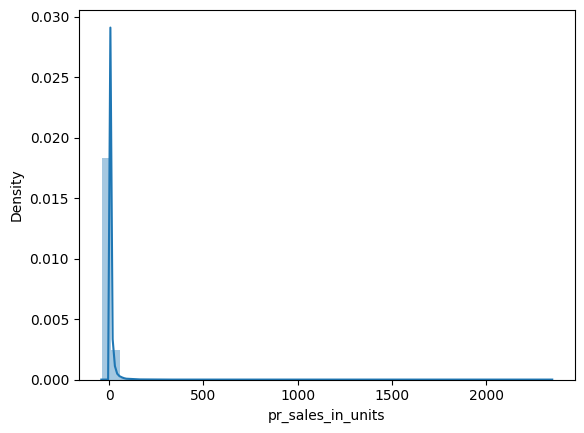

In [ ]:
#histogram
sns.distplot(sales_df_train['pr_sales_in_units']);

распределение отличается от нормального, имеет ярко выраженную положительную ассиметрию и является остроконечным

In [ ]:
description('pr_promo_sales_in_units')

наименование столбца: pr_promo_sales_in_units
тип данных: float64
пропущенные значения: 0
минимальное значение: -39.0
максимальное значение: 2348.0


есть отрицательные значения. Возвраты?

In [ ]:
negative_sales_rows = sales_df_train[sales_df_train['pr_sales_in_units'] < 0]

# Выводим результат
negative_sales_rows

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
656747,c81e728d9d4c2f636f067f89cc14862c,e79eb35132023b80bd8610a4ee16e52d,2022-08-07,False,-1.0,0.0,-312.0,0.0
619440,fa7cdfad1a5aaf8370ebeda47a1ff1c3,be2eb3bcc9ebeba04e0441004e9a674b,2022-08-09,False,-2.0,0.0,-411.0,0.0
84518,6364d3f0f495b6ab9dcf8d3b5c6e0b01,9a3e6ab0f0e9396f7af956fe6e45b407,2022-08-26,True,-9.0,-9.0,-204.0,-204.0
213799,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f0b2b0e013970cb4e096e3dbc561f434,2022-08-29,True,-1.0,-1.0,-109.0,-109.0
48802,16a5cdae362b8d27a1d8f8c7b78b4330,f2be582e5deaaa8558adfdcd1c92a6ac,2022-08-30,False,-2.0,0.0,-424.0,0.0
...,...,...,...,...,...,...,...,...
793930,c81e728d9d4c2f636f067f89cc14862c,1933ead077ee71dda8c85a7b769c8ef6,2023-06-18,True,-4.0,-4.0,-960.0,-960.0
87227,fa7cdfad1a5aaf8370ebeda47a1ff1c3,b32d54edfbef54504db682d7d6d5be8d,2023-06-22,True,-4.0,-4.0,-463.0,-463.0
497224,16a5cdae362b8d27a1d8f8c7b78b4330,40c651c778ea5ff2c54b164483dbae9c,2023-07-06,False,-2.0,0.0,-402.0,0.0
243182,c81e728d9d4c2f636f067f89cc14862c,68fe6e93944b69dea947fcf9a7ac2f97,2023-07-09,False,-1.0,0.0,-62.0,0.0


удалим

In [ ]:
negative_sales_indices = sales_df_train[sales_df_train['pr_sales_in_units'] < 0].index
sales_df_train = sales_df_train.drop(negative_sales_indices)

In [ ]:
# Находим строки, где оба столбца с кол-вом равны нулю 66543 строк
zero_sales_rows = sales_df_train[(sales_df_train['pr_sales_in_units'] == 0) & (sales_df_train['pr_promo_sales_in_units'] == 0)]
zero_sales_rows

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
569876,fa7cdfad1a5aaf8370ebeda47a1ff1c3,3b9ff9697e5688d38d5a0e7b0f0d519e,2022-08-01,False,0.0,0.0,59.0,0.0
497907,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f28e2941cd8ffdf35d778c3578cf7041,2022-08-01,False,0.0,0.0,83.0,0.0
581946,16a5cdae362b8d27a1d8f8c7b78b4330,706b9e39dd3ca40669b5f5c74bfebeb8,2022-08-01,False,0.0,0.0,76.0,0.0
312120,16a5cdae362b8d27a1d8f8c7b78b4330,04bbb07b1057b09d04209991f3eadd8f,2022-08-01,True,0.0,0.0,85.0,85.0
514767,16a5cdae362b8d27a1d8f8c7b78b4330,90702dbda20da8380fb559b1ea8c0140,2022-08-01,False,0.0,0.0,98.0,0.0
...,...,...,...,...,...,...,...,...
12406,42a0e188f5033bc65bf8d78622277c4e,6be39bc0f56a584c34705393e6fde8d9,2023-07-18,False,0.0,0.0,62.0,0.0
664958,c81e728d9d4c2f636f067f89cc14862c,064e3a5648fb4a7f911155bd81f87fd2,2023-07-18,True,0.0,0.0,71.0,71.0
510299,6364d3f0f495b6ab9dcf8d3b5c6e0b01,5a106bc85bf017f97a9afcda66b93f01,2023-07-18,False,0.0,0.0,53.0,0.0
853598,6364d3f0f495b6ab9dcf8d3b5c6e0b01,5b146d93f822459260216df28e572eca,2023-07-18,True,0.0,0.0,85.0,85.0


In [ ]:
# посмотрим у скольких строк при этом продажи выше 0
zero_sales_rows_1 = sales_df_train[(sales_df_train['pr_sales_in_units'] == 0) &
                                   (sales_df_train['pr_promo_sales_in_units'] == 0)&
                                    (sales_df_train['pr_sales_in_rub'] > 0)]
zero_sales_rows_1

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_promo_sales_in_units,pr_sales_in_rub,pr_promo_sales_in_rub
569876,fa7cdfad1a5aaf8370ebeda47a1ff1c3,3b9ff9697e5688d38d5a0e7b0f0d519e,2022-08-01,False,0.0,0.0,59.0,0.0
497907,fa7cdfad1a5aaf8370ebeda47a1ff1c3,f28e2941cd8ffdf35d778c3578cf7041,2022-08-01,False,0.0,0.0,83.0,0.0
581946,16a5cdae362b8d27a1d8f8c7b78b4330,706b9e39dd3ca40669b5f5c74bfebeb8,2022-08-01,False,0.0,0.0,76.0,0.0
312120,16a5cdae362b8d27a1d8f8c7b78b4330,04bbb07b1057b09d04209991f3eadd8f,2022-08-01,True,0.0,0.0,85.0,85.0
514767,16a5cdae362b8d27a1d8f8c7b78b4330,90702dbda20da8380fb559b1ea8c0140,2022-08-01,False,0.0,0.0,98.0,0.0
...,...,...,...,...,...,...,...,...
12406,42a0e188f5033bc65bf8d78622277c4e,6be39bc0f56a584c34705393e6fde8d9,2023-07-18,False,0.0,0.0,62.0,0.0
664958,c81e728d9d4c2f636f067f89cc14862c,064e3a5648fb4a7f911155bd81f87fd2,2023-07-18,True,0.0,0.0,71.0,71.0
510299,6364d3f0f495b6ab9dcf8d3b5c6e0b01,5a106bc85bf017f97a9afcda66b93f01,2023-07-18,False,0.0,0.0,53.0,0.0
853598,6364d3f0f495b6ab9dcf8d3b5c6e0b01,5b146d93f822459260216df28e572eca,2023-07-18,True,0.0,0.0,85.0,85.0


In [ ]:
# Вычисляем процент от общего числа строк
percentage_zero_sales = (len(zero_sales_rows) / len(sales_df_train)) * 100

# Выводим результат
print(f"Процент строк с нулевыми продажами: {percentage_zero_sales:.2f}%")

Процент строк с нулевыми продажами: 7.54%


In [ ]:
# Вычисляем процент от общего числа строк
percentage_zero_sales_1 = (len(zero_sales_rows_1) / len(sales_df_train)) * 100

# Выводим результат
print(f"Процент строк с нулевыми продажами: {percentage_zero_sales_1:.2f}%")

Процент строк с нулевыми продажами: 7.48%


Удалим их по рекомендации заказчика

In [ ]:
# Удаляем строки, где оба столбца равны нулю, и оставляем остальные столбцы
sales_df_train = sales_df_train.drop(sales_df_train[(sales_df_train['pr_sales_in_units'] == 0) &
                                   (sales_df_train['pr_promo_sales_in_units'] == 0)&
                                    (sales_df_train['pr_sales_in_rub'] > 0)].index)

In [ ]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816863 entries, 847222 to 779153
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   st_id                    816863 non-null  object        
 1   pr_sku_id                816863 non-null  object        
 2   date                     816863 non-null  datetime64[ns]
 3   pr_sales_type_id         816863 non-null  bool          
 4   pr_sales_in_units        816863 non-null  float64       
 5   pr_promo_sales_in_units  816863 non-null  float64       
 6   pr_sales_in_rub          816863 non-null  float64       
 7   pr_promo_sales_in_rub    816863 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(2)
memory usage: 50.6+ MB


In [ ]:
description('pr_sales_in_rub')

наименование столбца: pr_sales_in_rub
тип данных: float64
пропущенные значения: 0
минимальное значение: -321.0
максимальное значение: 183265.0


<ipython-input-24-115a96ef9edc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df_train['pr_sales_in_rub']);


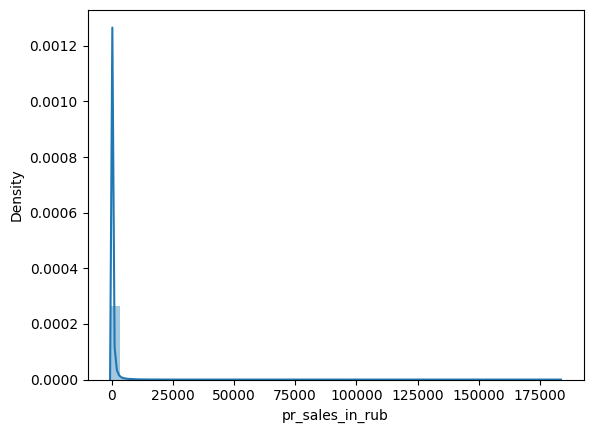

In [ ]:
#histogram
sns.distplot(sales_df_train['pr_sales_in_rub']);

In [ ]:
description('pr_promo_sales_in_rub')

наименование столбца: pr_promo_sales_in_rub
тип данных: float64
пропущенные значения: 0
минимальное значение: -321.0
максимальное значение: 183265.0


In [ ]:
# общее количество продаж по акции по магазинам
total_sales_by_shop = sales_df_train.groupby('st_id')['pr_promo_sales_in_units'].sum()
print(total_sales_by_shop.sort_values(ascending=False))
print('Всего:',total_sales_by_shop.sum())

st_id
c81e728d9d4c2f636f067f89cc14862c    410350.0
16a5cdae362b8d27a1d8f8c7b78b4330    360650.0
42a0e188f5033bc65bf8d78622277c4e    351534.0
f7e6c85504ce6e82442c770f7c8606f0    284194.0
6364d3f0f495b6ab9dcf8d3b5c6e0b01    266097.0
fa7cdfad1a5aaf8370ebeda47a1ff1c3    230133.0
1ecfb463472ec9115b10c292ef8bc986     51965.0
53e19f3dbb211f20b20b45668303c1b6     10301.0
bd470ca955d9497bbcb808e59952fffc      3583.0
1aa057313c28fa4a40c5bc084b11d276       418.0
62f91ce9b820a491ee78c108636db089        29.0
084a8a9aa8cced9175bd07bc44998e75        28.0
Name: pr_promo_sales_in_units, dtype: float64
Всего: 1969282.0


In [ ]:
# общее количество продаж по магазинам
total_sales_by_shop_n = sales_df_train.groupby('st_id')['pr_sales_in_units'].sum()
print(total_sales_by_shop_n.sort_values(ascending=False))
print('Всего:',total_sales_by_shop_n.sum())

st_id
c81e728d9d4c2f636f067f89cc14862c    958883.0
16a5cdae362b8d27a1d8f8c7b78b4330    872754.0
42a0e188f5033bc65bf8d78622277c4e    725656.0
f7e6c85504ce6e82442c770f7c8606f0    673708.0
fa7cdfad1a5aaf8370ebeda47a1ff1c3    532039.0
6364d3f0f495b6ab9dcf8d3b5c6e0b01    529951.0
1ecfb463472ec9115b10c292ef8bc986    129190.0
53e19f3dbb211f20b20b45668303c1b6     19227.0
bd470ca955d9497bbcb808e59952fffc      5114.0
1aa057313c28fa4a40c5bc084b11d276      2249.0
084a8a9aa8cced9175bd07bc44998e75        49.0
62f91ce9b820a491ee78c108636db089        35.0
Name: pr_sales_in_units, dtype: float64
Всего: 4448855.0


Т.к. в колонках pr_sales_in_units и pr_sales_in_rub содержится информация об общем кол-ве/сумме продаж за день, а к колонках с пометкой промо продажи по акции и эти суммы совпадает в случае наличия акции (товар не может в один день продаваться и по акции и без) - предлагю удалить столбцы с пометкой промо, их функцию выполняет столбец с маркером о наличии акции.

In [ ]:
# Удаляем столбцы pr_promo_sales_in_units и pr_promo_sales_in_rub
sales_df_train = sales_df_train.drop(['pr_promo_sales_in_units', 'pr_promo_sales_in_rub'], axis=1)


In [ ]:
sales_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816863 entries, 847222 to 779153
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   st_id              816863 non-null  object        
 1   pr_sku_id          816863 non-null  object        
 2   date               816863 non-null  datetime64[ns]
 3   pr_sales_type_id   816863 non-null  bool          
 4   pr_sales_in_units  816863 non-null  float64       
 5   pr_sales_in_rub    816863 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 38.2+ MB


#pr_df информация о товарах

От большего к меньшему pr_group_id - pr_cat_id - pr_subcat_id - pr_sku_id.

Столбцы:
- pr_group_id – захэшированная группа товара;
- pr_cat_id – захэшированная категория товара;
- pr_subcat_id – захэшированная подкатегория товара;
- pr_sku_id – захэшированное id товара;
- pr_uom_id (маркер, обозначающий продаётся товар на вес или в ШТ).

In [ ]:
def description(column):
    print('наименование столбца:', column)
    print('тип данных:', pr_df[column].dtypes)
    print('пропущенные значения:', pr_df[column].isna().sum())
    if pr_df[column].dtypes == 'object':
        print('уникальные значения:', '\n', pr_df[column].value_counts())
    else:
        print('минимальное значение:', pr_df[column].min())
        print('максимальное значение:', pr_df[column].max())

In [ ]:
pr_df

,pr_sku_id,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id
0,fd064933250b0bfe4f926b867b0a5ec8,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
1,71c9661741caf40a92a32d1cc8206c04,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
2,00b72c2f01a1512cbb1d3f33319bac93,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,d407a3ebb4ab9b0d68b224486f8b8dad,17
3,9bc40cd2fe4f188f402bb41548c5e15c,c74d97b01eae257e44aa9d5bade97baf,1bc0249a6412ef49b07fe6f62e6dc8de,ca34f669ae367c87f0e75dcae0f61ee5,17
4,3a74a370c8eb032acb11ad9119242b8f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,e06f5ed77191826c212c30722f2cc5a2,17
...,...,...,...,...,...
2045,2c3b895d9fccc33226fee2c521618893,c74d97b01eae257e44aa9d5bade97baf,a2cc63e065705fe938a4dda49092966f,4589b8f516d28558b3850c37776cadc8,1
2046,6058d6b7d1f04803d15d1896d3256c92,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,c0a667df8f0d6ee98dda972b0870fabf,1
2047,3beeab85046ca201d73bb9d129bcfc3f,c74d97b01eae257e44aa9d5bade97baf,c559da2ba967eb820766939a658022c8,34d2777e78ccf007523e2dd1fcea6b2d,17
2048,b9e2f33d70ffb02d6d04f470da2e45c9,aab3238922bcc25a6f606eb525ffdc56,3de2334a314a7a72721f1f74a6cb4cee,0f3abfd67959c079e7b3759440e7415c,17


In [ ]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pr_sku_id     2050 non-null   object
 1   pr_group_id   2050 non-null   object
 2   pr_cat_id     2050 non-null   object
 3   pr_subcat_id  2050 non-null   object
 4   pr_uom_id     2050 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.2+ KB


In [ ]:
description('pr_group_id')

наименование столбца: pr_group_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 c74d97b01eae257e44aa9d5bade97baf    806
aab3238922bcc25a6f606eb525ffdc56    717
6512bd43d9caa6e02c990b0a82652dca    203
c51ce410c124a10e0db5e4b97fc2af39    182
c20ad4d76fe97759aa27a0c99bff6710     73
1ff1de774005f8da13f42943881c655f     37
32bb90e8976aab5298d5da10fe66f21d     27
98f13708210194c475687be6106a3b84      4
3c59dc048e8850243be8079a5c74d079      1
Name: pr_group_id, dtype: int64


In [ ]:
description('pr_cat_id')

наименование столбца: pr_cat_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 c559da2ba967eb820766939a658022c8    265
9701a1c165dd9420816bfec5edd6c2b1    222
1bc0249a6412ef49b07fe6f62e6dc8de    211
28fc2782ea7ef51c1104ccf7b9bea13d    167
46771d1f432b42343f56f791422a4991    112
f3173935ed8ac4bf073c1bcd63171f8a    111
e58cc5ca94270acaceed13bc82dfedf7     99
a368b0de8b91cfb3f91892fbf1ebd4b2     88
3de2334a314a7a72721f1f74a6cb4cee     79
fb2fcd534b0ff3bbed73cc51df620323     72
535ab76633d94208236a2e829ea6d888     61
b7087c1f4f89e63af8d46f3b20271153     43
7a6a74cbe87bc60030a4bd041dd47b78     42
b59c67bf196a4758191e42f76670ceba     39
a6ea8471c120fe8cc35a2954c9b9c595     37
faafda66202d234463057972460c04f5     33
c9f95a0a5af052bffce5c89917335f67     33
fd5c905bcd8c3348ad1b35d7231ee2b1     31
4edaa105d5f53590338791951e38c3ad     31
5caf41d62364d5b41a893adc1a9dd5d4     30
6d9c547cf146054a5a720606a7694467     25
186a157b2992e7daed3677ce8e9fe40f     25
a14ac55a4f27472c5d894e

In [ ]:
description('pr_subcat_id')

наименование столбца: pr_subcat_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 8feef08314d477a5b68ba18a6d35819d    72
c01c475ac8d447730ece97d846cc4f25    60
0f3abfd67959c079e7b3759440e7415c    49
41b1d51c9e3ba9a263361f9cfa0eb434    48
c93c26cd49ea08e6b8984351d4164575    48
                                    ..
9d8f103e98545ee0e66801f0699110bf     1
858da246521bcdc8490ff01828e36f22     1
bb44cd485a19a2b227b3ccc473d10302     1
2a5b7197a4980fa272ebe4822ce9d95a     1
bd64a7fd410708f485412e9feabefde9     1
Name: pr_subcat_id, Length: 170, dtype: int64


In [ ]:
description('pr_uom_id')
pr_df['pr_uom_id'].value_counts()


наименование столбца: pr_uom_id
тип данных: int64
пропущенные значения: 0
минимальное значение: 1
максимальное значение: 17


1     1279
17     771
Name: pr_uom_id, dtype: int64

приведем к бинарному типу?

In [ ]:
pr_df['pr_uom_id'] = pr_df['pr_uom_id'].replace({17: 0})
pr_df['pr_uom_id'] = pr_df['pr_uom_id'].astype(bool)

In [ ]:
pr_df['pr_uom_id'].value_counts()

True     1279
False     771
Name: pr_uom_id, dtype: int64

#st_df информация о магазинах

- st_id – захэшированное id магазина;
- st_city_id – захэшированное id города;
- st_division_code id – захэшированное id дивизиона;
- st_type_format_id – id формата магазина;
- st_type_loc_id – id тип локации/окружения магазина;
- st_type_size_id – id типа размера магазина;
- st_is_active – флаг активного магазина на данный момент.

In [ ]:
def description(column):
    print('наименование столбца:', column)
    print('тип данных:', st_df[column].dtypes)
    print('пропущенные значения:', st_df[column].isna().sum())
    if st_df[column].dtypes == 'object':
        print('уникальные значения:', '\n', st_df[column].value_counts())
    else:
        print('минимальное значение:', st_df[column].min())
        print('максимальное значение:', st_df[column].max())

In [ ]:
st_df

,st_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active
0,1aa057313c28fa4a40c5bc084b11d276,1587965fb4d4b5afe8428a4a024feb0d,81b4dd343f5880df806d4c5d4a846c64,4,3,19,0
1,bd470ca955d9497bbcb808e59952fffc,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,19,1
2,6364d3f0f495b6ab9dcf8d3b5c6e0b01,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
3,1ecfb463472ec9115b10c292ef8bc986,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,2,1,28,1
4,16a5cdae362b8d27a1d8f8c7b78b4330,c1f75cc0f7fe269dd0fd9bd5e24f9586,296bd0cc6e735f9d7488ebc8fbc19130,1,2,8,1
5,53e19f3dbb211f20b20b45668303c1b6,955d864a62659945cc9434898e275deb,e26072c92d8fe0738df44d571d5f5e8b,4,3,20,1
6,42a0e188f5033bc65bf8d78622277c4e,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1,1,12,1
7,c81e728d9d4c2f636f067f89cc14862c,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1,1,8,1
8,fa7cdfad1a5aaf8370ebeda47a1ff1c3,885fe656777008c335ac96072a45be15,296bd0cc6e735f9d7488ebc8fbc19130,1,1,12,1
9,f7e6c85504ce6e82442c770f7c8606f0,3202111cf90e7c816a472aaceb72b0df,32586311f16876abf92901085bd87b99,1,1,12,1


In [ ]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   st_id              12 non-null     object
 1   st_city_id         12 non-null     object
 2   st_division_code   12 non-null     object
 3   st_type_format_id  12 non-null     int64 
 4   st_type_loc_id     12 non-null     int64 
 5   st_type_size_id    12 non-null     int64 
 6   st_is_active       12 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


In [ ]:
description('st_id')

наименование столбца: st_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 1aa057313c28fa4a40c5bc084b11d276    1
bd470ca955d9497bbcb808e59952fffc    1
6364d3f0f495b6ab9dcf8d3b5c6e0b01    1
1ecfb463472ec9115b10c292ef8bc986    1
16a5cdae362b8d27a1d8f8c7b78b4330    1
53e19f3dbb211f20b20b45668303c1b6    1
42a0e188f5033bc65bf8d78622277c4e    1
c81e728d9d4c2f636f067f89cc14862c    1
fa7cdfad1a5aaf8370ebeda47a1ff1c3    1
f7e6c85504ce6e82442c770f7c8606f0    1
62f91ce9b820a491ee78c108636db089    1
084a8a9aa8cced9175bd07bc44998e75    1
Name: st_id, dtype: int64


In [ ]:
description('st_city_id')

наименование столбца: st_city_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 1587965fb4d4b5afe8428a4a024feb0d    2
955d864a62659945cc9434898e275deb    2
b8b4b727d6f5d1b61fff7be687f7970f    2
908c9a564a86426585b29f5335b619bc    2
3202111cf90e7c816a472aaceb72b0df    2
c1f75cc0f7fe269dd0fd9bd5e24f9586    1
885fe656777008c335ac96072a45be15    1
Name: st_city_id, dtype: int64


In [ ]:
description('st_division_code')

наименование столбца: st_division_code
тип данных: object
пропущенные значения: 0
уникальные значения: 
 81b4dd343f5880df806d4c5d4a846c64    2
e26072c92d8fe0738df44d571d5f5e8b    2
da742b3cfca5388aaf9af28a726a3c30    2
429a86ff6336c144ddaf6144f52ab52c    2
296bd0cc6e735f9d7488ebc8fbc19130    2
32586311f16876abf92901085bd87b99    2
Name: st_division_code, dtype: int64


In [ ]:
st_df['st_type_format_id'].value_counts()

1    6
4    5
2    1
Name: st_type_format_id, dtype: int64

In [ ]:
st_df['st_type_loc_id'].value_counts()

1    6
3    5
2    1
Name: st_type_loc_id, dtype: int64

In [ ]:
st_df['st_type_size_id'].value_counts()

12    4
19    3
8     2
28    1
20    1
32    1
Name: st_type_size_id, dtype: int64

In [ ]:
st_df['st_is_active'].value_counts()

1    10
0     2
Name: st_is_active, dtype: int64

In [ ]:
st_df.groupby(['st_id'])['st_is_active'].sum()

st_id
084a8a9aa8cced9175bd07bc44998e75    1
16a5cdae362b8d27a1d8f8c7b78b4330    1
1aa057313c28fa4a40c5bc084b11d276    0
1ecfb463472ec9115b10c292ef8bc986    1
42a0e188f5033bc65bf8d78622277c4e    1
53e19f3dbb211f20b20b45668303c1b6    1
62f91ce9b820a491ee78c108636db089    0
6364d3f0f495b6ab9dcf8d3b5c6e0b01    1
bd470ca955d9497bbcb808e59952fffc    1
c81e728d9d4c2f636f067f89cc14862c    1
f7e6c85504ce6e82442c770f7c8606f0    1
fa7cdfad1a5aaf8370ebeda47a1ff1c3    1
Name: st_is_active, dtype: int64

# Объединенная таблица для дальнейшей работы

In [ ]:
def description(column):
    print('наименование столбца:', column)
    print('тип данных:', final_merged_df[column].dtypes)
    print('пропущенные значения:', final_merged_df[column].isna().sum())
    if final_merged_df[column].dtypes == 'object':
        print('уникальные значения:', '\n', final_merged_df[column].value_counts())
    else:
        print('минимальное значение:', final_merged_df[column].min())
        print('максимальное значение:', final_merged_df[column].max())

In [ ]:
# Объединяем таблицы по столбцу 'pr_sku_id'
merged_df = sales_df_train.merge(pr_df, on='pr_sku_id', how='left')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816863 entries, 0 to 816862
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   st_id              816863 non-null  object        
 1   pr_sku_id          816863 non-null  object        
 2   date               816863 non-null  datetime64[ns]
 3   pr_sales_type_id   816863 non-null  bool          
 4   pr_sales_in_units  816863 non-null  float64       
 5   pr_sales_in_rub    816863 non-null  float64       
 6   pr_group_id        816863 non-null  object        
 7   pr_cat_id          816863 non-null  object        
 8   pr_subcat_id       816863 non-null  object        
 9   pr_uom_id          816863 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(2), object(5)
memory usage: 57.6+ MB


In [ ]:
# Объединяем таблицы merged_df и st_df по столбцу 'st_id'
final_merged_df = merged_df.merge(st_df, on='st_id', how='left')

In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816863 entries, 0 to 816862
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   st_id              816863 non-null  object        
 1   pr_sku_id          816863 non-null  object        
 2   date               816863 non-null  datetime64[ns]
 3   pr_sales_type_id   816863 non-null  bool          
 4   pr_sales_in_units  816863 non-null  float64       
 5   pr_sales_in_rub    816863 non-null  float64       
 6   pr_group_id        816863 non-null  object        
 7   pr_cat_id          816863 non-null  object        
 8   pr_subcat_id       816863 non-null  object        
 9   pr_uom_id          816863 non-null  bool          
 10  st_city_id         816863 non-null  object        
 11  st_division_code   816863 non-null  object        
 12  st_type_format_id  816863 non-null  int64         
 13  st_type_loc_id     816863 non-null  int64   

In [ ]:
#Удалим строки описывающие продажи в неактивных магазинах.
final_merged_df = final_merged_df[final_merged_df['st_is_active'] != 0]

In [ ]:
description('st_city_id')

наименование столбца: st_city_id
тип данных: object
пропущенные значения: 0
уникальные значения: 
 b8b4b727d6f5d1b61fff7be687f7970f    234106
908c9a564a86426585b29f5335b619bc    211120
c1f75cc0f7fe269dd0fd9bd5e24f9586    144087
3202111cf90e7c816a472aaceb72b0df    114383
885fe656777008c335ac96072a45be15    100909
955d864a62659945cc9434898e275deb     11529
Name: st_city_id, dtype: int64


Теперь наша таблица охватывает 6 городов, посмотрим сколько магазинов в каждом

In [ ]:
# Группируем данные по столбцу 'st_city_id' и считаем уникальные значения столбца 'st_id' для каждой группы
unique_store_counts = final_merged_df.groupby('st_city_id')['st_id'].nunique()
unique_store_counts

st_city_id
3202111cf90e7c816a472aaceb72b0df    2
885fe656777008c335ac96072a45be15    1
908c9a564a86426585b29f5335b619bc    2
955d864a62659945cc9434898e275deb    2
b8b4b727d6f5d1b61fff7be687f7970f    2
c1f75cc0f7fe269dd0fd9bd5e24f9586    1
Name: st_id, dtype: int64

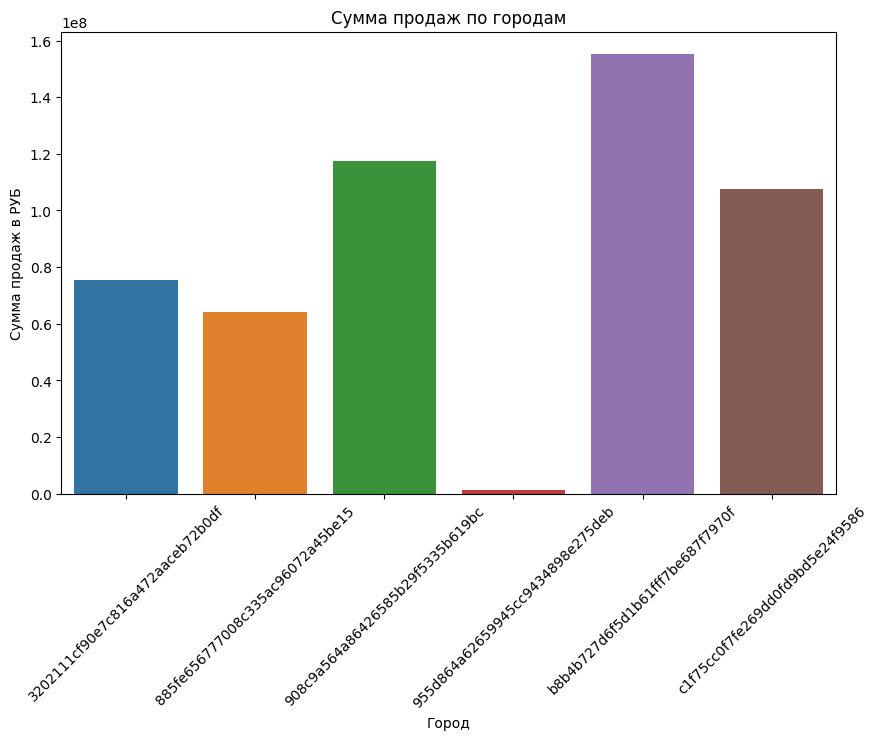

In [ ]:
# Группируем данные по столбцу 'st_city_id' и суммируем продажи в каждом городе
city_sales = final_merged_df.groupby('st_city_id')['pr_sales_in_rub'].sum().reset_index()

# Строим гистограмму
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.barplot(x='st_city_id', y='pr_sales_in_rub', data=city_sales)
plt.xlabel('Город')
plt.ylabel('Сумма продаж в РУБ')
plt.title('Сумма продаж по городам')
plt.xticks(rotation=45)  # Поворачиваем подписи по оси X, чтобы они были читаемыми

# Отображаем график
plt.show()

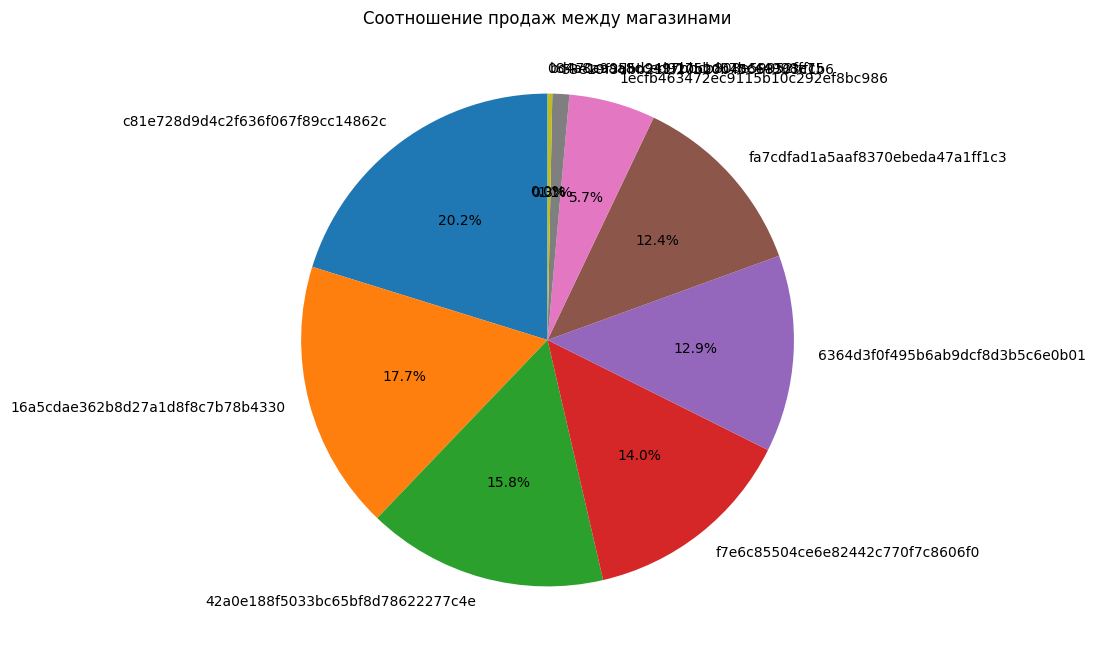

In [ ]:
# Группируем данные по магазинам и считаем количество продаж в каждом магазине
store_sales = final_merged_df['st_id'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(8, 8))
store_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Соотношение продаж между магазинами')
plt.show()

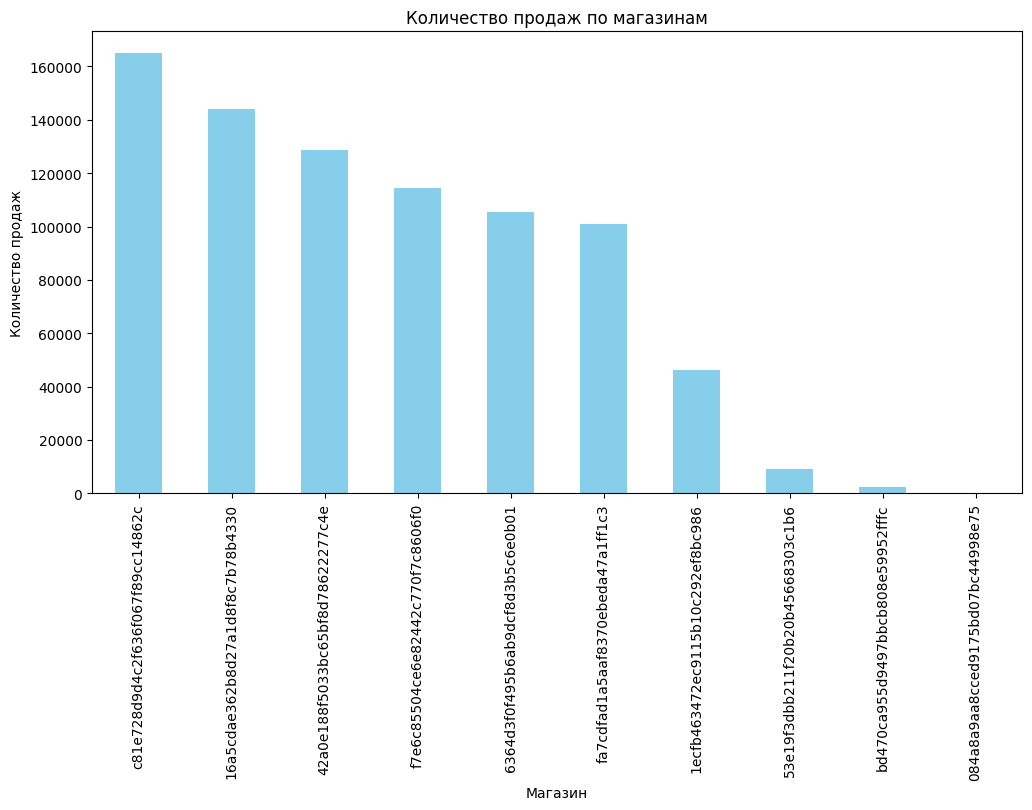

In [ ]:
# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Магазин')
plt.ylabel('Количество продаж')
plt.title('Количество продаж по магазинам')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Добавляем столбец 'year' с годами
final_merged_df.loc[:, 'year'] = final_merged_df['date'].dt.year

# Добавляем столбец 'month' с месяцами
final_merged_df.loc[:, 'month'] = final_merged_df['date'].dt.month

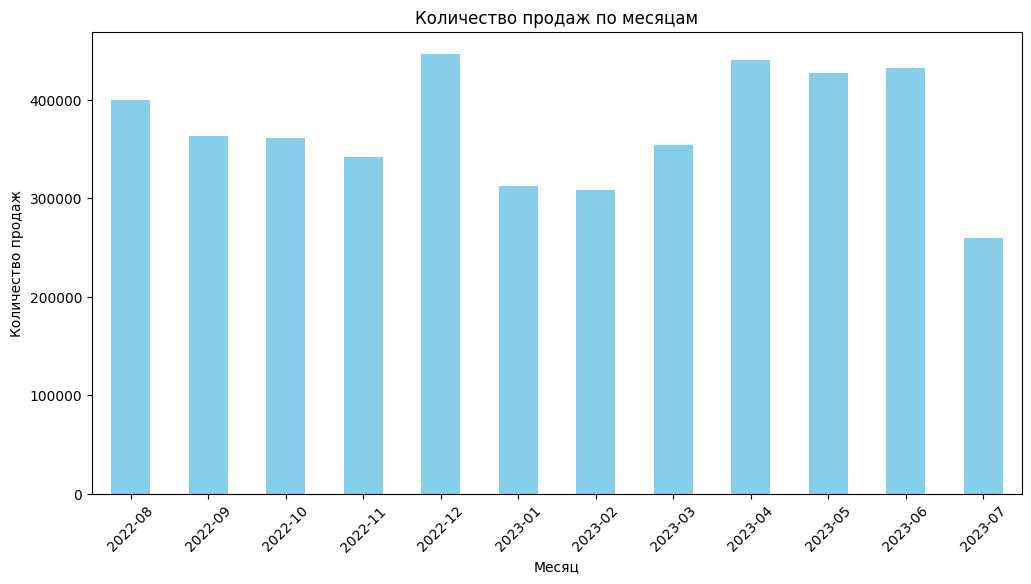

In [ ]:
# Группируем данные по месяцам и считаем количество продаж в каждом месяце
monthly_sales = final_merged_df.groupby(final_merged_df['date'].dt.strftime('%Y-%m'))['pr_sales_in_units'].sum()

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж')
plt.title('Количество продаж по месяцам')
plt.xticks(rotation=45)
plt.show()

<ipython-input-63-68f01a21fd69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_merged_df.corr()


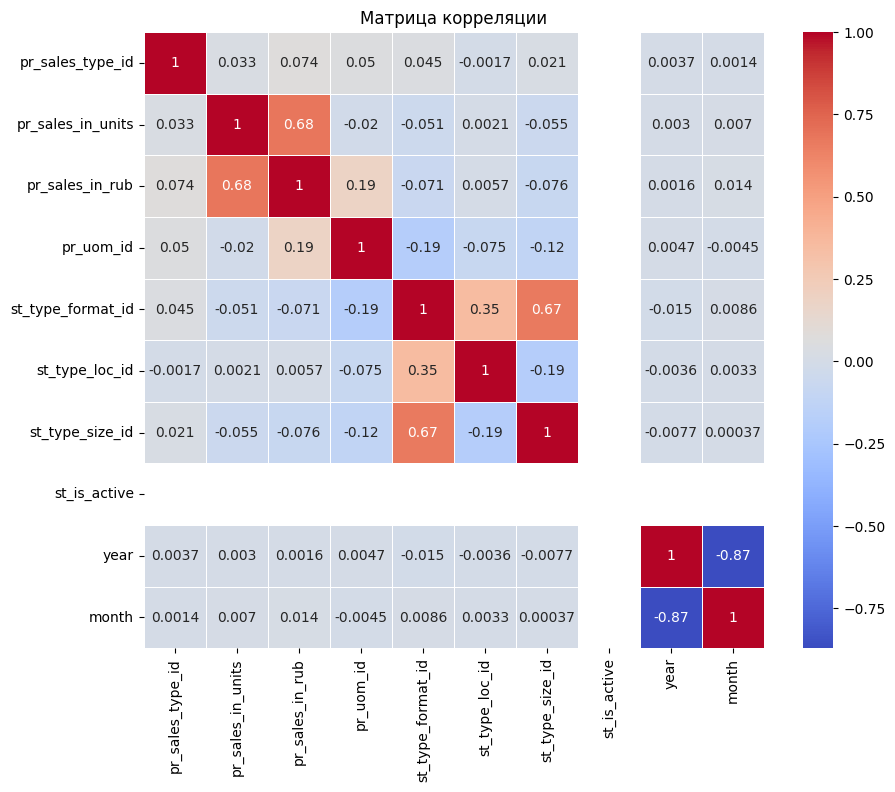

In [ ]:
# Вычисляем матрицу корреляции
correlation_matrix = final_merged_df.corr()
# Строим тепловую карту для матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [ ]:
dubl = final_merged_df[final_merged_df.duplicated()]

In [ ]:
dubl

,st_id,pr_sku_id,date,pr_sales_type_id,pr_sales_in_units,pr_sales_in_rub,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active,year,month


In [ ]:
final_merged_df.duplicated().sum()

0

Посмотрю на график продаж вместе с 7-дневней средней

<Axes: xlabel='date'>

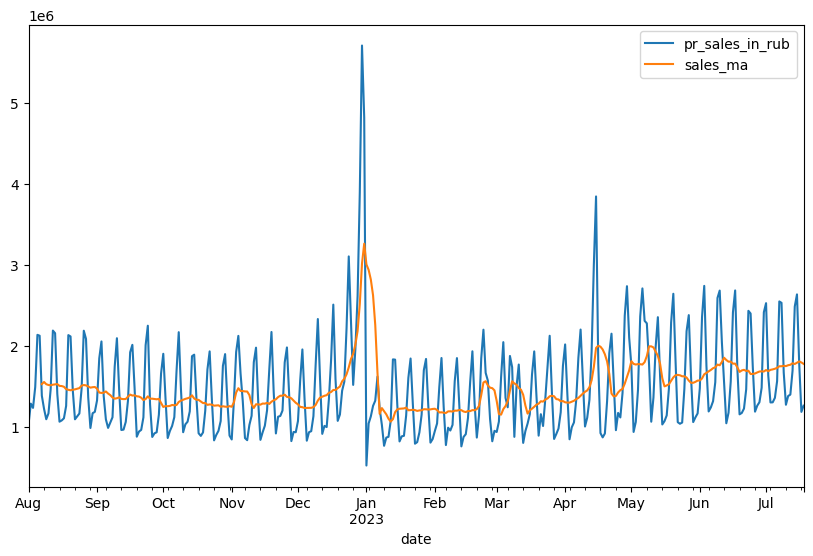

In [ ]:
from plotly.subplots import make_subplots
df_sales = final_merged_df.groupby('date').agg({"pr_sales_in_rub" : "sum"}).reset_index()

df_sales['sales_ma'] = df_sales['pr_sales_in_rub'].rolling(7).mean()
df_sales=df_sales.set_index('date')
df_sales.plot(figsize=(10, 6))

Общие Продажи в каждом магазине и каждого товара

<Axes: xlabel='st_id'>

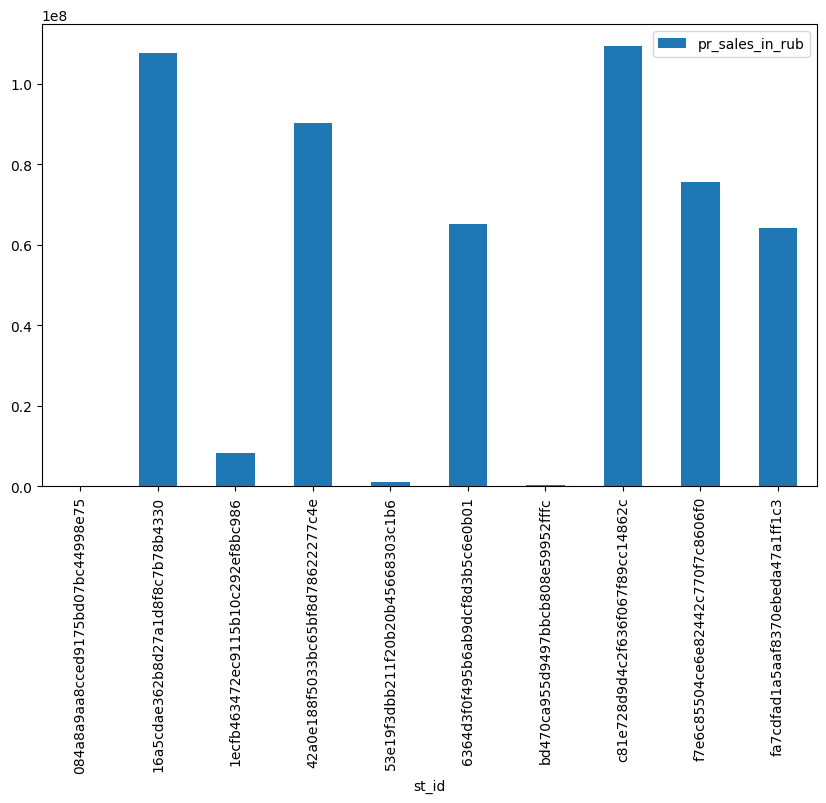

In [ ]:
final_merged_df.pivot_table(index='st_id',values='pr_sales_in_rub',aggfunc='sum').plot(kind='bar',figsize=(10, 6))

Общие продажи в магазинах по размерам последних

<Axes: xlabel='st_type_size_id'>

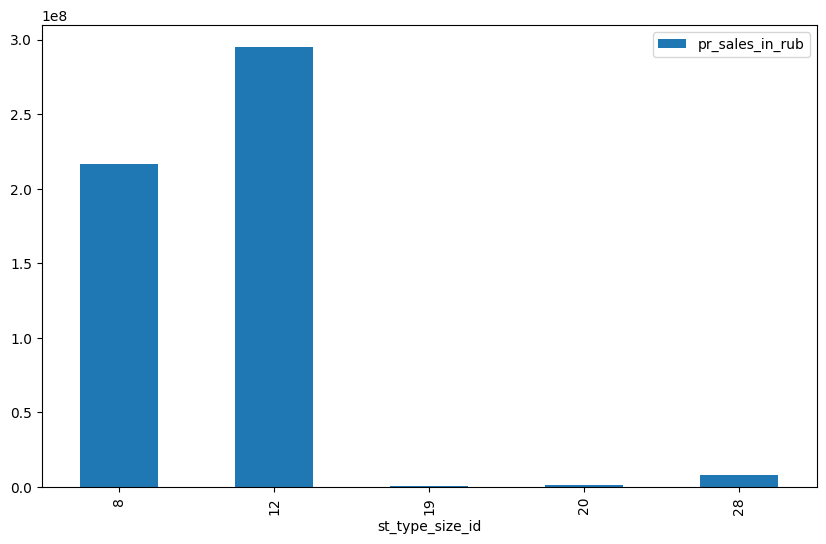

In [ ]:
final_merged_df.pivot_table(index='st_type_size_id',values='pr_sales_in_rub',aggfunc='sum').plot(kind='bar',figsize=(10, 6))

ПРодажи по форматам магазинов

<Axes: xlabel='st_type_format_id'>

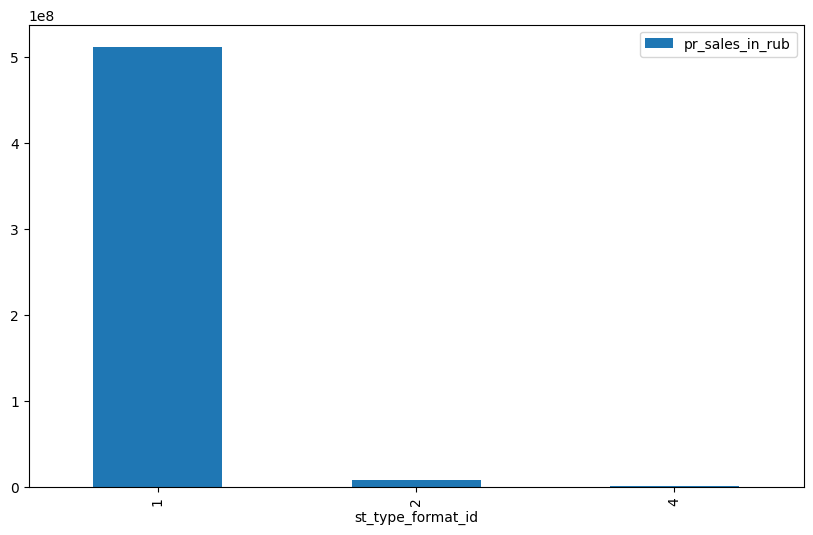

In [ ]:
final_merged_df.pivot_table(index='st_type_format_id',values='pr_sales_in_rub',aggfunc='sum').plot(kind='bar',figsize=(10, 6))

Общие продажи по каждому товару

<Axes: xlabel='pr_sku_id'>

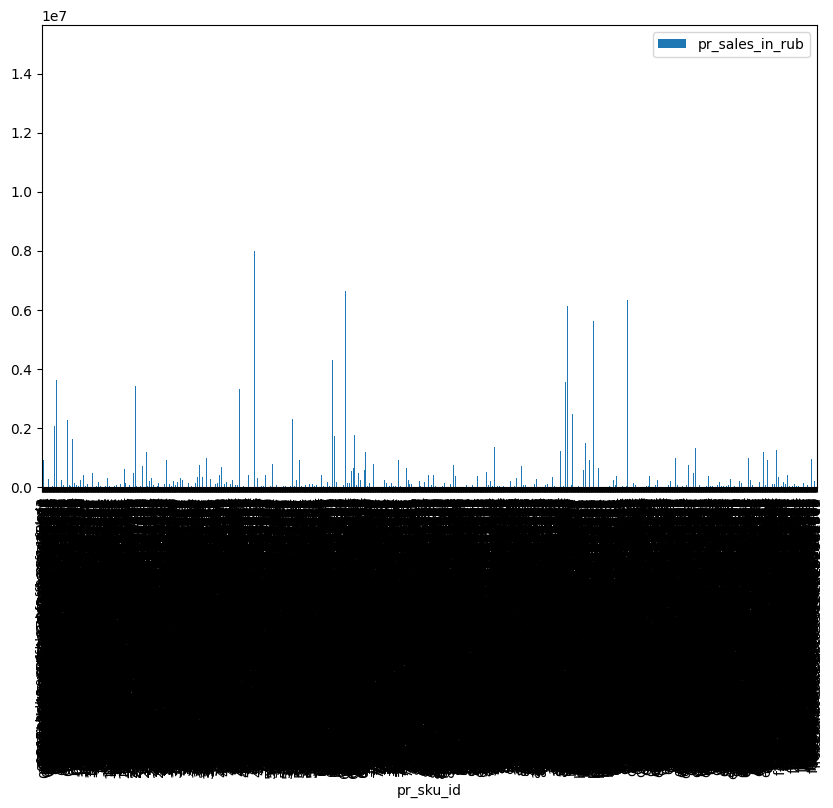

In [ ]:
final_merged_df.pivot_table(index='pr_sku_id',values='pr_sales_in_rub',aggfunc='sum').plot(kind='bar',figsize=(10, 6))

In [ ]:
final_merged_df.pivot_table(index=['st_id','month'],values='pr_sku_id',aggfunc='count')#.query('pr_sku_id<33')

pr_sku_id
st_id                            month           
084a8a9aa8cced9175bd07bc44998e75 3              5
                                 4             18
                                 5              6
                                 6              9
16a5cdae362b8d27a1d8f8c7b78b4330 1          11624
...                                           ...
fa7cdfad1a5aaf8370ebeda47a1ff1c3 8           8217
                                 9           8219
                                 10          8341
                                 11          8013
                                 12          9487

[111 rows x 1 columns]

Нужно решить, что делаем с магазином  084a8a9aa8cced9175bd07bc44998e75

График продаж по товарам

<Axes: xlabel='date'>

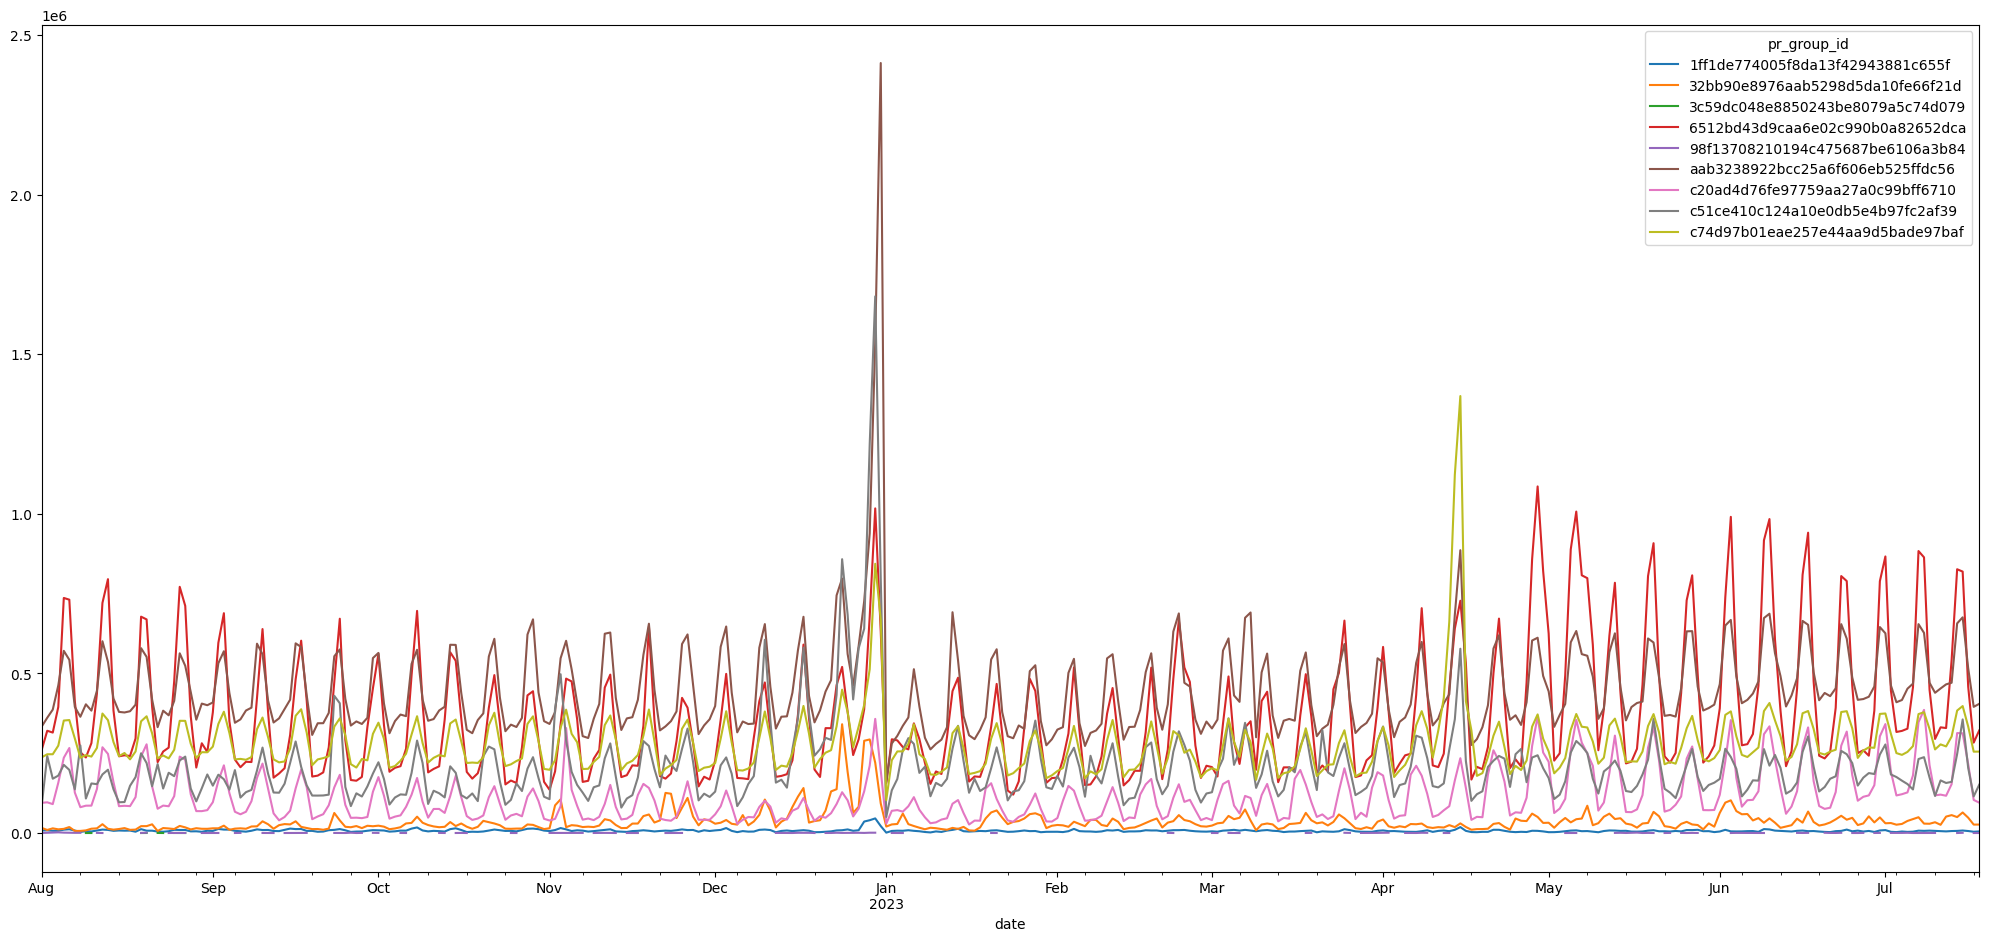

In [ ]:
final_merged_df.pivot_table(index='date',values='pr_sales_in_rub',columns='pr_group_id',aggfunc='sum').plot(figsize=(25, 11))

График продаж во всех магазинах

<Axes: xlabel='date'>

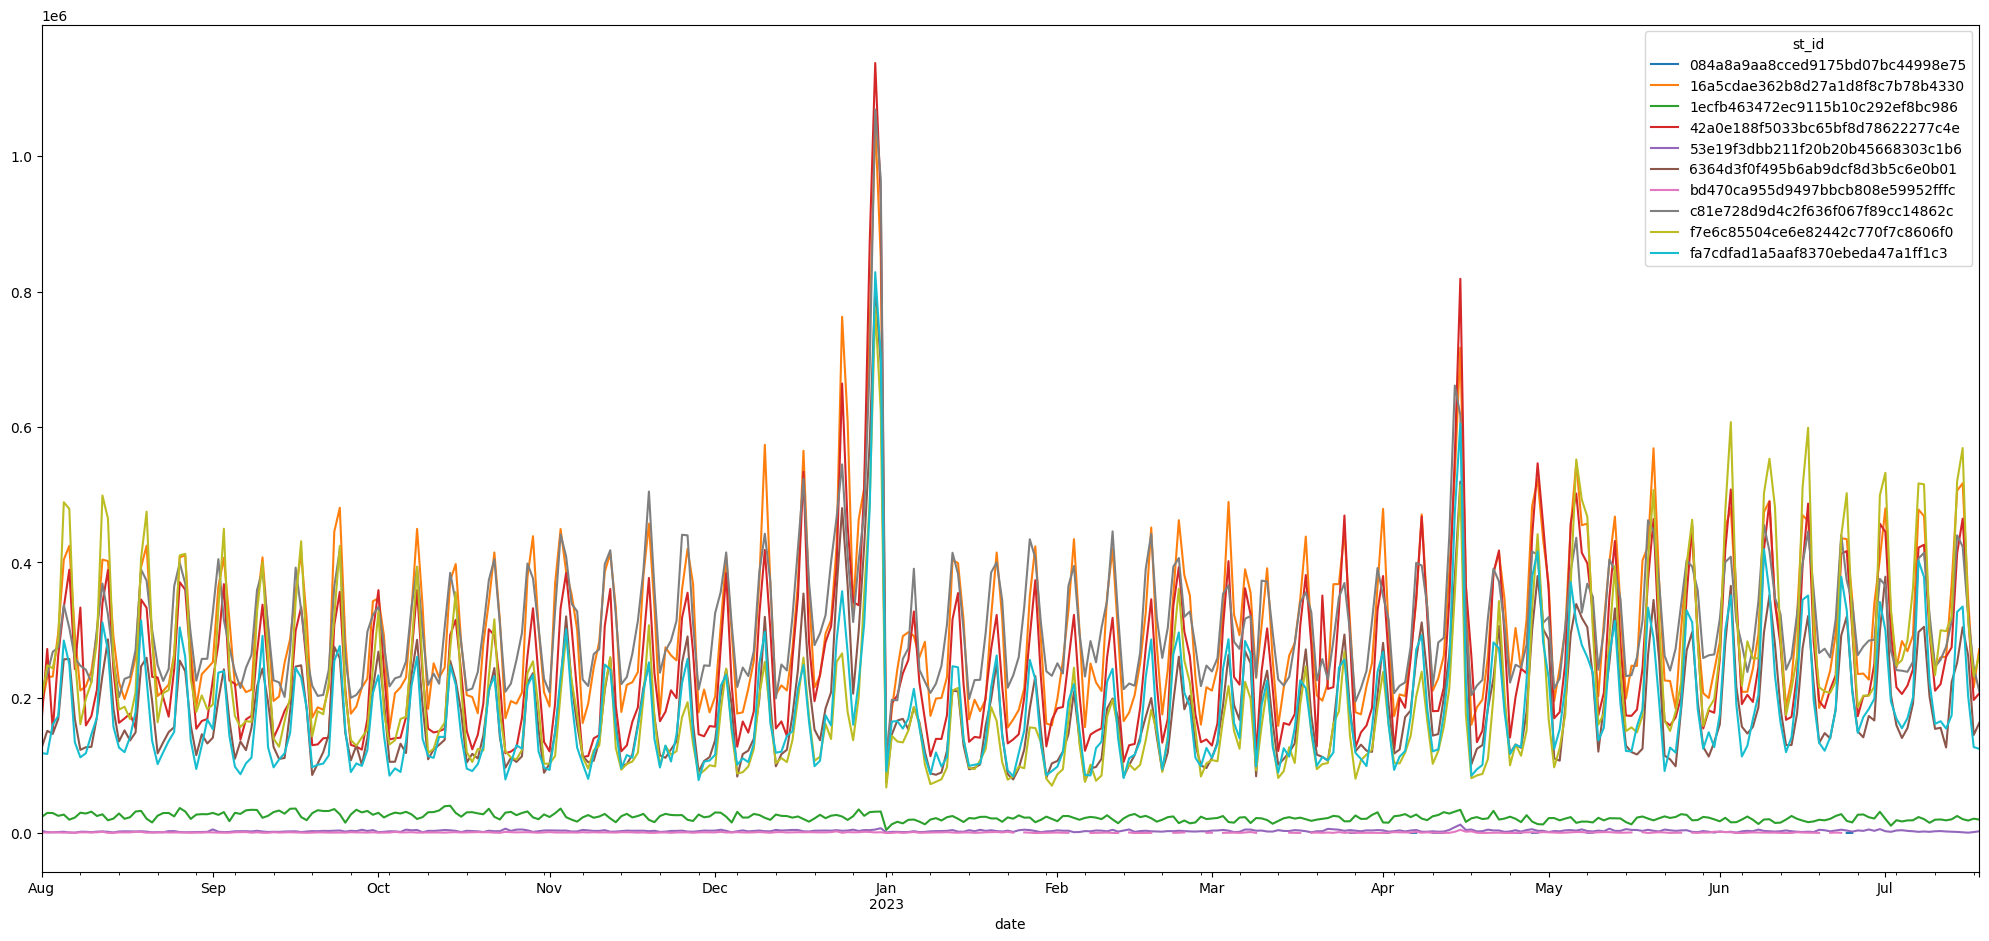

In [ ]:
final_merged_df.pivot_table(index='date',values='pr_sales_in_rub',columns='st_id',aggfunc='sum').plot(figsize=(25, 11))

In [ ]:
# Исследование пропусков
missing_values = final_merged_df.isnull().sum()
print("Пропущенные значения в каждой колонке:")
print(missing_values)



Пропущенные значения в каждой колонке:
st_id                0
pr_sku_id            0
date                 0
pr_sales_type_id     0
pr_sales_in_units    0
pr_sales_in_rub      0
pr_group_id          0
pr_cat_id            0
pr_subcat_id         0
pr_uom_id            0
st_city_id           0
st_division_code     0
st_type_format_id    0
st_type_loc_id       0
st_type_size_id      0
st_is_active         0
year                 0
month                0
dtype: int64


In [ ]:
# Исследование выбросов (для числовых признаков)
numeric_columns = final_merged_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    q1 = final_merged_df[column].quantile(0.25)
    q3 = final_merged_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = final_merged_df[(final_merged_df[column] < lower_bound) | (final_merged_df[column] > upper_bound)]
    if not outliers.empty:
        print(f"Выбросы в колонке {column}:")
        print(outliers)


Выбросы в колонке pr_sales_in_units:
                                   st_id                         pr_sku_id  \
3       fa7cdfad1a5aaf8370ebeda47a1ff1c3  c4a665596d4f67cecb7542c9fad407ee   
27      c81e728d9d4c2f636f067f89cc14862c  1097627f4fe36c774e8a13d096a9a5ef   
34      c81e728d9d4c2f636f067f89cc14862c  777d21d980f82aa8b4f26f4a4d3dda1d   
36      c81e728d9d4c2f636f067f89cc14862c  0a2090e24b6ae62b0b0fcaa67a72b5a0   
66      16a5cdae362b8d27a1d8f8c7b78b4330  f8e67df2dd557f44074271107ab9781a   
...                                  ...                               ...   
816792  c81e728d9d4c2f636f067f89cc14862c  194adbcaa46104c43d41ad4f23c18407   
816799  c81e728d9d4c2f636f067f89cc14862c  225de5ef23fbfa96f02a8e1e8626ab66   
816820  42a0e188f5033bc65bf8d78622277c4e  4b083e10f6cd2f4360c5425d05be6386   
816847  16a5cdae362b8d27a1d8f8c7b78b4330  5ca106c323e777ec8b42dbbab099932c   
816857  16a5cdae362b8d27a1d8f8c7b78b4330  c0e3f3bd815a862433bc3399c487926b   

             date  pr_sale

# вариации

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816134 entries, 0 to 816862
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   st_id              816134 non-null  object        
 1   pr_sku_id          816134 non-null  object        
 2   date               816134 non-null  datetime64[ns]
 3   pr_sales_type_id   816134 non-null  bool          
 4   pr_sales_in_units  816134 non-null  float64       
 5   pr_sales_in_rub    816134 non-null  float64       
 6   pr_group_id        816134 non-null  object        
 7   pr_cat_id          816134 non-null  object        
 8   pr_subcat_id       816134 non-null  object        
 9   pr_uom_id          816134 non-null  bool          
 10  st_city_id         816134 non-null  object        
 11  st_division_code   816134 non-null  object        
 12  st_type_format_id  816134 non-null  int64         
 13  st_type_loc_id     816134 non-null  int64   

проверка на стационаность


In [ ]:
from statsmodels.tsa.stattools import kpss

# Проверка стационарности временного ряда с помощью KPSS-теста
result = kpss(final_merged_df['pr_sales_in_units'], regression='ct')  # 'c' означает с константой, 'ct' - с константой и трендом

# Вывод результатов теста
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Lags Used:', result[2])
print('Critical Values:')
for key, value in result[3].items():
    print(f'   {key}: {value}')

KPSS Statistic: 2.732704158769389
p-value: 0.01
Lags Used: 212
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


<ipython-input-79-7c081b0748fa>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(final_merged_df['pr_sales_in_units'], regression='ct')  # 'c' означает с константой, 'ct' - с константой и трендом


Исходя из результатов, p-value равно 0.01, что меньше уровня значимости 0.05, и KPSS Statistic больше всех критических значений. Это говорит о том, что нулевая гипотеза о стационарности отвергается, и ременной ряд скорее всего нестационарен.

In [ ]:
final_merged_df['stationary_series'] = final_merged_df['pr_sales_in_units'].diff()

result = kpss(final_merged_df['pr_sales_in_units'], regression='c')

# Вывод результатов теста
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Lags Used:', result[2])
print('Critical Values:')
for key, value in result[3].items():
    print(f'   {key}: {value}')

KPSS Statistic: 7.851974934133131
p-value: 0.01
Lags Used: 214
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


<ipython-input-80-44c61f4ee9af>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(final_merged_df['pr_sales_in_units'], regression='c')


Lambda value: -0.7511261943009787


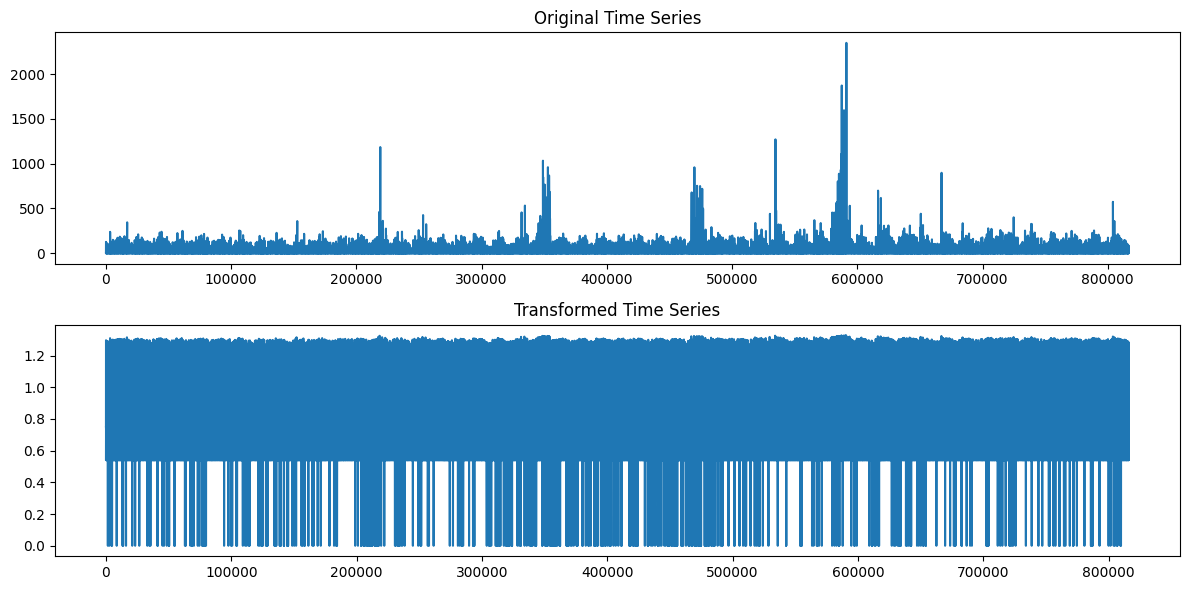

In [ ]:
from scipy.stats import boxcox

# Применение преобразования Бокса-Кокса к столбцу 'pr_sales_in_units'
original_series = final_merged_df['pr_sales_in_units']
transformed_series, lambda_value = boxcox(original_series + 1)

# Вывод параметра lambda, который оптимизирует преобразование
print(f'Lambda value: {lambda_value}')

# Сравнение исходного и преобразованного временных рядов
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(original_series)
plt.title('Original Time Series')

plt.subplot(2, 1, 2)
plt.plot(transformed_series)
plt.title('Transformed Time Series')

plt.tight_layout()
plt.show()



## попытка установить дату индексом и не потерять данные

In [ ]:
#final_merged_df.set_index(['date', final_merged_df.groupby('date').cumcount()], inplace=True)

применим экспоненциальное сглаживание

#анализа корреляции между товарами

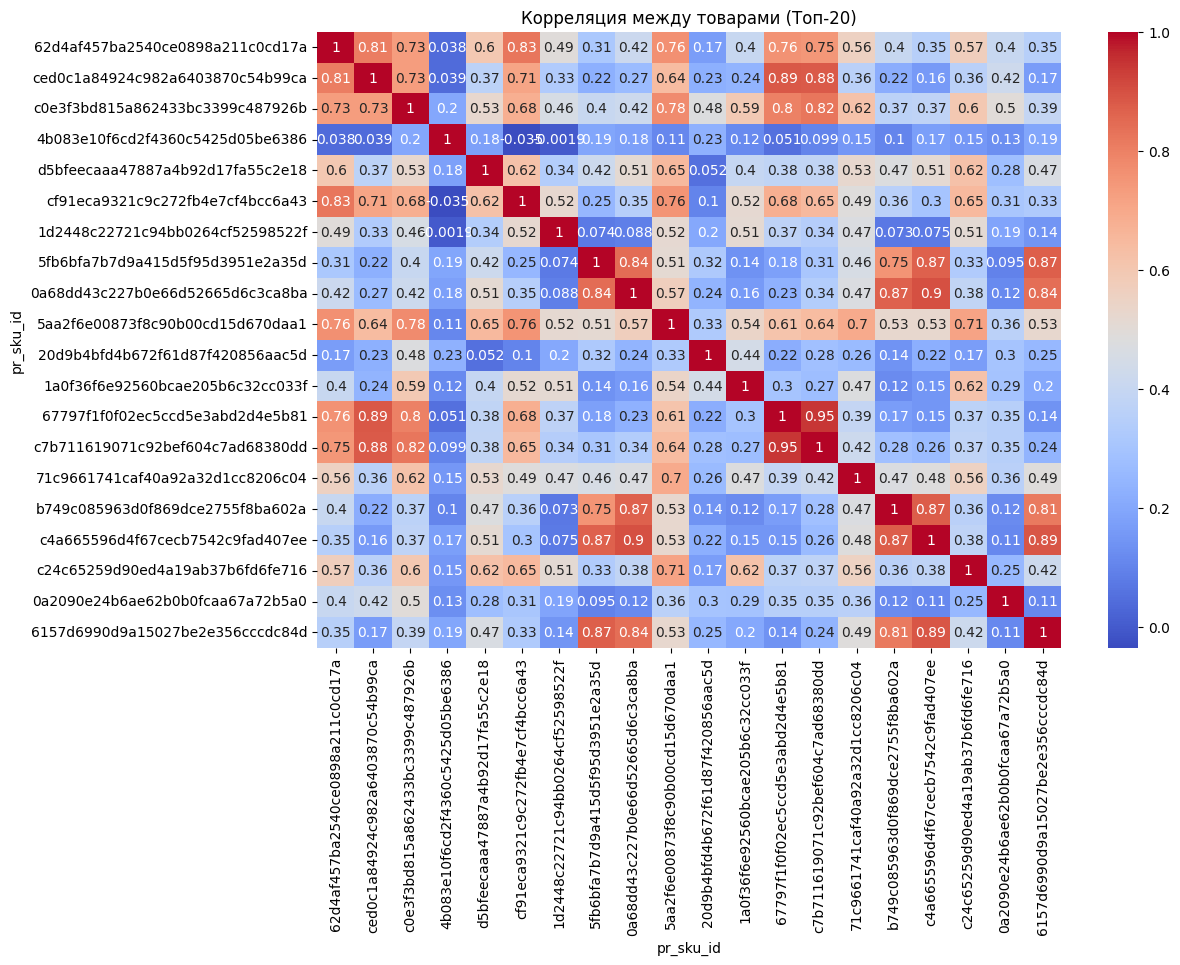

In [ ]:
data = final_merged_df[['pr_sku_id', 'date', 'pr_sales_in_units']]

# Создадим сводную таблицу (pivot table), где строки - товары, столбцы - даты, значения - продажи
sales_pivot = data.pivot_table(index='pr_sku_id', columns='date', values='pr_sales_in_units', aggfunc='sum', fill_value=0)

# Транспонируем таблицу, чтобы даты стали индексами
sales_pivot = sales_pivot.T
# Выберем наиболее продаваемые товары (например, топ-20)
top_n_products = sales_pivot.sum().nlargest(20).index
correlation_matrix = sales_pivot[top_n_products].corr()

# Визуализация результатов (тепловая карта корреляции)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между товарами (Топ-20)')
plt.show()

# WAPE

In [ ]:
def wape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))


# модели иерархического прогнозирования

In [ ]:
# создание иерархической структуры
hierarchical_data = final_merged_df.groupby(['pr_group_id', 'pr_cat_id', 'pr_subcat_id', 'pr_sku_id', 'st_id']).agg({'pr_sales_in_units': 'sum'})

In [ ]:
# проверка на стационарность
from statsmodels.tsa.stattools import adfuller, kpss

# Пример кода для проверки стационарности с помощью ADF-теста
result_adf = adfuller(hierarchical_data['pr_sales_in_units'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])

ADF Statistic: -11.790157937518474
p-value: 9.870151676354754e-22


ременной ряд, скорее всего, стационарен, так как значение ADF Statistic намного меньше критических значений и p-значение близко к нулю.

# CatBoostRegressor

In [ ]:
! pip install catboost
from datetime import timedelta
from catboost import CatBoostRegressor
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [ ]:
# Начальная дата и период прогнозирования
start_date = final_merged_df['date'].min()
forecast_period = 14

# Шаг перемещения окна
window_step = 7

# Список для хранения прогнозов
all_forecasts = []

# Цикл для перемещения окна по данным
current_date = pd.to_datetime(start_date)
end_date = final_merged_df['date'].max()
num_iterations = 0  # Счетчик итераций

NameError: ignored

In [ ]:
# Функция для добавления нулевых продаж для отсутствующих дат
#  уникальные комбинации 'st_id' и 'pr_sku_id'
unique_combinations = final_merged_df[['st_id', 'pr_sku_id']].drop_duplicates()

#  пустой DataFrame для хранения полного набора дат
complete_dates_df = pd.DataFrame(columns=['date', 'st_id', 'pr_sku_id', 'pr_sales_in_units'])

# Для каждой уникальной комбинации 'st_id' и 'pr_sku_id' - полный набор дат
for _, row in unique_combinations.iterrows():
    st_id, pr_sku_id = row['st_id'], row['pr_sku_id']
    subset_df = final_merged_df[(final_merged_df['st_id'] == st_id) & (final_merged_df['pr_sku_id'] == pr_sku_id)]
    min_date = start_date
    max_date = end_date
    all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
    complete_subset = pd.DataFrame({
        'date': all_dates,
        'st_id': st_id,
        'pr_sku_id': pr_sku_id
    })
    # добавим продажи из исходного DataFrame к полному набору дат
    complete_subset = complete_subset.merge(subset_df, on=['st_id', 'pr_sku_id', 'date'], how='left')
    complete_subset['pr_sales_in_units'].fillna(0, inplace=True)
    complete_dates_df = pd.concat([complete_dates_df, complete_subset])

# проверим формат даты
complete_dates_df['date'] = pd.to_datetime(complete_dates_df['date'])

# Теперь complete_dates_df должен содержать полный набор дат для каждой уникальной комбинации 'st_id' и 'pr_sku_id',
# с продажами, заполненными нулями для отсутствующих дат.



In [ ]:
from google.colab import files


# Сохранить DataFrame в CSV файл
complete_dates_df.to_csv('complete_dates_data.csv', index=False)

# Скачать файл
files.download('complete_dates_data.csv')

MessageError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path_5 = '/content/drive/MyDrive/Хакатон/complete_dates_data.csv'
# Читаем файл в DataFrame
complete_dates_data = pd.read_csv(file_path_5)


Mounted at /content/drive


In [ ]:
complete_dates_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312402 entries, 0 to 2312401
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   date               object 
 1   st_id              object 
 2   pr_sku_id          object 
 3   pr_sales_in_units  float64
 4   pr_sales_type_id   object 
 5   pr_sales_in_rub    float64
 6   pr_group_id        object 
 7   pr_cat_id          object 
 8   pr_subcat_id       object 
 9   pr_uom_id          object 
 10  st_city_id         object 
 11  st_division_code   object 
 12  st_type_format_id  float64
 13  st_type_loc_id     float64
 14  st_type_size_id    float64
 15  st_is_active       float64
 16  year               float64
 17  month              float64
 18  stationary_series  float64
dtypes: float64(9), object(10)
memory usage: 335.2+ MB


In [ ]:
complete_dates_data['date'] = pd.to_datetime(complete_dates_data['date'])

In [ ]:
complete_dates_data

,date,st_id,pr_sku_id,pr_sales_in_units,pr_sales_type_id,pr_sales_in_rub,pr_group_id,pr_cat_id,pr_subcat_id,pr_uom_id,st_city_id,st_division_code,st_type_format_id,st_type_loc_id,st_type_size_id,st_is_active,year,month
0,2022-08-01,42a0e188f5033bc65bf8d78622277c4e,5781a2637b476d781eb3134581b32044,2.0,False,463.0,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,aa50d6506c1e1b3f030c0b19962eb625,True,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1.0,1.0,12.0,1.0,2022.0,8.0
1,2022-08-02,42a0e188f5033bc65bf8d78622277c4e,5781a2637b476d781eb3134581b32044,2.0,False,435.0,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,aa50d6506c1e1b3f030c0b19962eb625,True,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1.0,1.0,12.0,1.0,2022.0,8.0
2,2022-08-03,42a0e188f5033bc65bf8d78622277c4e,5781a2637b476d781eb3134581b32044,2.0,False,418.0,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,aa50d6506c1e1b3f030c0b19962eb625,True,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1.0,1.0,12.0,1.0,2022.0,8.0
3,2022-08-04,42a0e188f5033bc65bf8d78622277c4e,5781a2637b476d781eb3134581b32044,7.0,False,1328.0,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,aa50d6506c1e1b3f030c0b19962eb625,True,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1.0,1.0,12.0,1.0,2022.0,8.0
4,2022-08-05,42a0e188f5033bc65bf8d78622277c4e,5781a2637b476d781eb3134581b32044,4.0,False,830.0,6512bd43d9caa6e02c990b0a82652dca,e58cc5ca94270acaceed13bc82dfedf7,aa50d6506c1e1b3f030c0b19962eb625,True,b8b4b727d6f5d1b61fff7be687f7970f,da742b3cfca5388aaf9af28a726a3c30,1.0,1.0,12.0,1.0,2022.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312397,2023-07-14,f7e6c85504ce6e82442c770f7c8606f0,5fe37f4172dba10ee53aa18629ad31b3,0.0,False,0.0,c51ce410c124a10e0db5e4b97fc2af39,fd5c905bcd8c3348ad1b35d7231ee2b1,3dde95bfddfc5c387eb9e7b7a77dfa63,True,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1.0,1.0,8.0,1.0,2023.0,7.0
2312398,2023-07-15,f7e6c85504ce6e82442c770f7c8606f0,5fe37f4172dba10ee53aa18629ad31b3,0.0,False,0.0,c51ce410c124a10e0db5e4b97fc2af39,fd5c905bcd8c3348ad1b35d7231ee2b1,3dde95bfddfc5c387eb9e7b7a77dfa63,True,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1.0,1.0,8.0,1.0,2023.0,7.0
2312399,2023-07-16,f7e6c85504ce6e82442c770f7c8606f0,5fe37f4172dba10ee53aa18629ad31b3,0.0,False,0.0,c51ce410c124a10e0db5e4b97fc2af39,fd5c905bcd8c3348ad1b35d7231ee2b1,3dde95bfddfc5c387eb9e7b7a77dfa63,True,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1.0,1.0,8.0,1.0,2023.0,7.0
2312400,2023-07-17,f7e6c85504ce6e82442c770f7c8606f0,5fe37f4172dba10ee53aa18629ad31b3,0.0,False,0.0,c51ce410c124a10e0db5e4b97fc2af39,fd5c905bcd8c3348ad1b35d7231ee2b1,3dde95bfddfc5c387eb9e7b7a77dfa63,True,908c9a564a86426585b29f5335b619bc,429a86ff6336c144ddaf6144f52ab52c,1.0,1.0,8.0,1.0,2023.0,7.0


In [ ]:
# Заполняем пропущенные значения в столбцах pr_sales_type_id и pr_sales_in_rub
complete_dates_data['pr_sales_type_id'].fillna(False, inplace=True)
complete_dates_data['pr_sales_in_rub'].fillna(0, inplace=True)

# Группируем данные по магазину и товару и заполняем пропущенные значения предыдущими значениями из той же группы
complete_dates_data['pr_sales_type_id'] = complete_dates_data.groupby(['st_id', 'pr_sku_id'])['pr_sales_type_id'].transform(lambda x: x.fillna(method='ffill'))
complete_dates_data['pr_sales_in_rub'] = complete_dates_data.groupby(['st_id', 'pr_sku_id'])['pr_sales_in_rub'].transform(lambda x: x.fillna(method='ffill'))

# Затем используем ffill для заполнения остальных пропущенных значений
complete_dates_data.fillna(method='ffill', inplace=True)



In [ ]:
complete_dates_data.drop(columns=['stationary_series'], inplace=True)


In [ ]:
# Начальная дата и период прогнозирования
start_date = complete_dates_data['date'].min()
forecast_period = 14

# Шаг перемещения окна
window_step = 7

# Список для хранения прогнозов
all_forecasts = []

# Цикл для перемещения окна по данным
current_date = pd.to_datetime(start_date)
end_date = complete_dates_data['date'].max()
num_iterations = 0  # Счетчик итераций

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# Создаем списки для хранения метрик WAPE
wape_validation_scores = []
wape_test_scores = []

# Шаг перемещения окна
window_step = 7

# Начальная дата и период прогнозирования
start_date = complete_dates_data['date'].min()
end_date = complete_dates_data['date'].max()
forecast_period = 14

current_date = pd.to_datetime(start_date)

while current_date + timedelta(days=forecast_period) <= end_date:
    # временное окно для обучения
    train_start = current_date - pd.DateOffset(months=6)
    train_end = current_date - timedelta(days=1)

    # временное окно для валидации
    validation_start = current_date
    validation_end = current_date + timedelta(days=6)

    # временное окно для теста
    test_start = current_date + timedelta(days=7)
    test_end = current_date + timedelta(days=forecast_period)

    # проверка, чтобы избежать выхода за пределы доступных данных на последней итерации
    if test_end <= end_date:
        # данные для обучения, валидации и теста
        train_data = complete_dates_data[(complete_dates_data['date'] >= train_start) & (complete_dates_data['date'] <= train_end)]
        validation_data = complete_dates_data[(complete_dates_data['date'] >= validation_start) & (complete_dates_data['date'] <= validation_end)]
        test_data = complete_dates_data[(complete_dates_data['date'] >= test_start) & (complete_dates_data['date'] <= test_end)]

        # Фильтрация и сортировка train_data
        train_data.sort_values(by='date', inplace=True)

        # проверка монотонности даты для тренировочных данных
        assert train_data['date'].is_monotonic_increasing, f"Даты в тренировочных данных не монотонно возрастают."

        # подготовка данных для CatBoost
        X_train = train_data.drop(columns=['pr_sales_in_units'])
        y_train = train_data['pr_sales_in_units']
        X_validation = validation_data.drop(columns=['pr_sales_in_units'])
        y_validation = validation_data['pr_sales_in_units']
        X_test = test_data.drop(columns=['pr_sales_in_units'])
        y_test = test_data['pr_sales_in_units']

        # создание и обучение модели CatBoost
        categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
        model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='MAE',
                          cat_features=categorical_features_indices, verbose=False)

        # Сортировка датасета по датам
        test_data.sort_values(by='date', inplace=True)

        # проверка монотонности даты для тренировочных данных
        assert train_data['date'].is_monotonic_increasing, f"Даты в тренировочных данных не монотонно возрастают."

        # проверка монотонности даты для тестовых данных
        assert test_data['date'].is_monotonic_increasing, f"Даты в тестовых данных не монотонно возрастают."

        wape_validation = 0  # Инициализация переменной wape_validation значением по умолчанию
        wape_test = 0  # Инициализация переменной wape_test значением по умолчанию

        if not y_train.empty and not y_validation.empty:
          model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=10, verbose=10)

          # Прогнозы для валидационного и тестового периодов
          validation_forecasts = model.predict(X_validation)
          test_forecasts = model.predict(X_test)

          # Сохранение прогнозов
          all_forecasts.append({'validation': validation_forecasts, 'test': test_forecasts})

          # Метрика WAPE для каждой итерации
          wape_validation = wape(y_validation, validation_forecasts)
          wape_test = wape(y_test, test_forecasts)


          print(f"WAPE on Validation Set = {wape_validation}, WAPE on Test Set = {wape_test}")

        else:
            print("Ошибка: Целевые переменные пусты!")




        # сохранение метрик WAPE
        wape_validation_scores.append(wape_validation)
        wape_test_scores.append(wape_test)

    # перемещение окна
    current_date += timedelta(days=window_step)

# вывод средних значений метрик WAPE
print(f"Average Validation WAPE: {sum(wape_validation_scores) / len(wape_validation_scores)}")
print(f"Average Test WAPE: {sum(wape_test_scores) / len(wape_test_scores)}")


<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Ошибка: Целевые переменные пусты!
0:	learn: 1.9280742	test: 1.9395165	best: 1.9395165 (0)	total: 183ms	remaining: 3m 3s
10:	learn: 1.3064384	test: 1.3115642	best: 1.3115642 (10)	total: 3.86s	remaining: 5m 46s
20:	learn: 0.9732617	test: 0.9810935	best: 0.9810935 (20)	total: 7.04s	remaining: 5m 28s
30:	learn: 0.7870700	test: 0.7945961	best: 0.7945961 (30)	total: 9.54s	remaining: 4m 58s
40:	learn: 0.7360241	test: 0.7443617	best: 0.7443617 (40)	total: 11.9s	remaining: 4m 39s
50:	learn: 0.6816411	test: 0.6936764	best: 0.6936764 (50)	total: 14s	remaining: 4m 20s
60:	learn: 0.6415033	test: 0.6577091	best: 0.6577091 (60)	total: 17.5s	remaining: 4m 29s
70:	learn: 0.6211665	test: 0.6378034	best: 0.6378034 (70)	total: 21.5s	remaining: 4m 41s
80:	learn: 0.6035192	test: 0.6207470	best: 0.6207470 (80)	total: 23.8s	remaining: 4m 30s
90:	learn: 0.5902689	test: 0.6065673	best: 0.6065435 (89)	total: 26.1s	remaining: 4m 21s
100:	learn: 0.5792736	test: 0.5966808	best: 0.5966808 (100)	total: 28.6s	remainin

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.9488961	test: 1.9103676	best: 1.9103676 (0)	total: 247ms	remaining: 4m 6s
10:	learn: 1.3265118	test: 1.2895555	best: 1.2895555 (10)	total: 2.36s	remaining: 3m 31s
20:	learn: 0.9832705	test: 0.9530490	best: 0.9530490 (20)	total: 4.52s	remaining: 3m 30s
30:	learn: 0.8009029	test: 0.7858581	best: 0.7858581 (30)	total: 6.88s	remaining: 3m 35s
40:	learn: 0.6868576	test: 0.6799409	best: 0.6799409 (40)	total: 10.1s	remaining: 3m 56s
50:	learn: 0.6416432	test: 0.6353071	best: 0.6353071 (50)	total: 11.8s	remaining: 3m 40s
60:	learn: 0.6237812	test: 0.6174698	best: 0.6174698 (60)	total: 13.5s	remaining: 3m 27s
70:	learn: 0.6078605	test: 0.6006013	best: 0.6006013 (70)	total: 15s	remaining: 3m 16s
80:	learn: 0.5943389	test: 0.5863501	best: 0.5863501 (80)	total: 16.5s	remaining: 3m 7s
90:	learn: 0.5820834	test: 0.5732370	best: 0.5732370 (90)	total: 18.1s	remaining: 3m
100:	learn: 0.5689449	test: 0.5615321	best: 0.5615321 (100)	total: 19.6s	remaining: 2m 54s
110:	learn: 0.5575894	test: 0

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.9223353	test: 1.9374126	best: 1.9374126 (0)	total: 263ms	remaining: 4m 22s
10:	learn: 1.2787394	test: 1.2944639	best: 1.2944639 (10)	total: 2.95s	remaining: 4m 25s
20:	learn: 0.9153340	test: 0.9263241	best: 0.9263241 (20)	total: 5.86s	remaining: 4m 33s
30:	learn: 0.7741487	test: 0.7725965	best: 0.7725965 (30)	total: 9.55s	remaining: 4m 58s
40:	learn: 0.6971351	test: 0.6918060	best: 0.6918060 (40)	total: 12.4s	remaining: 4m 50s
50:	learn: 0.6483122	test: 0.6457223	best: 0.6457223 (50)	total: 14.5s	remaining: 4m 29s
60:	learn: 0.6114425	test: 0.6101318	best: 0.6101318 (60)	total: 16.7s	remaining: 4m 16s
70:	learn: 0.5968810	test: 0.5947059	best: 0.5947059 (70)	total: 18.6s	remaining: 4m 3s
80:	learn: 0.5816437	test: 0.5784366	best: 0.5784366 (80)	total: 20.5s	remaining: 3m 52s
90:	learn: 0.5716651	test: 0.5696524	best: 0.5696524 (90)	total: 23.5s	remaining: 3m 54s
100:	learn: 0.5592448	test: 0.5569539	best: 0.5569539 (100)	total: 26s	remaining: 3m 51s
110:	learn: 0.5471848	te

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.9239938	test: 1.8438165	best: 1.8438165 (0)	total: 219ms	remaining: 3m 38s
10:	learn: 1.2414868	test: 1.1659390	best: 1.1659390 (10)	total: 4.25s	remaining: 6m 22s
20:	learn: 0.9417571	test: 0.8775429	best: 0.8775429 (20)	total: 8.28s	remaining: 6m 26s
30:	learn: 0.8135616	test: 0.7630496	best: 0.7630496 (30)	total: 14.4s	remaining: 7m 30s
40:	learn: 0.7428169	test: 0.6981795	best: 0.6981795 (40)	total: 17.6s	remaining: 6m 50s
50:	learn: 0.6806160	test: 0.6473028	best: 0.6473028 (50)	total: 21s	remaining: 6m 30s
60:	learn: 0.6387822	test: 0.6151569	best: 0.6151569 (60)	total: 23.9s	remaining: 6m 7s
70:	learn: 0.6127254	test: 0.5915890	best: 0.5915890 (70)	total: 28.4s	remaining: 6m 11s
80:	learn: 0.5995497	test: 0.5793513	best: 0.5793513 (80)	total: 31s	remaining: 5m 51s
90:	learn: 0.5779884	test: 0.5584485	best: 0.5584485 (90)	total: 33.6s	remaining: 5m 36s
100:	learn: 0.5664328	test: 0.5473564	best: 0.5473564 (100)	total: 36.4s	remaining: 5m 23s
110:	learn: 0.5520076	test

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.9182980	test: 1.7632307	best: 1.7632307 (0)	total: 787ms	remaining: 13m 6s
10:	learn: 1.2755218	test: 1.1404430	best: 1.1404430 (10)	total: 6.69s	remaining: 10m 1s
20:	learn: 0.9386836	test: 0.8400290	best: 0.8400290 (20)	total: 11.4s	remaining: 8m 49s
30:	learn: 0.7666606	test: 0.7034084	best: 0.7034084 (30)	total: 17s	remaining: 8m 50s
40:	learn: 0.6749366	test: 0.6289373	best: 0.6289373 (40)	total: 21.1s	remaining: 8m 12s
50:	learn: 0.6339053	test: 0.5935731	best: 0.5935731 (50)	total: 24.8s	remaining: 7m 41s
60:	learn: 0.6174492	test: 0.5765793	best: 0.5765793 (60)	total: 28s	remaining: 7m 10s
70:	learn: 0.6002561	test: 0.5611870	best: 0.5611870 (70)	total: 34.1s	remaining: 7m 26s
80:	learn: 0.5816934	test: 0.5433777	best: 0.5433777 (80)	total: 40.6s	remaining: 7m 40s
90:	learn: 0.5660232	test: 0.5287142	best: 0.5287142 (90)	total: 45s	remaining: 7m 29s
100:	learn: 0.5596477	test: 0.5221963	best: 0.5221963 (100)	total: 49.2s	remaining: 7m 17s
110:	learn: 0.5474512	test:

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8840452	test: 1.7964933	best: 1.7964933 (0)	total: 983ms	remaining: 16m 21s
10:	learn: 1.2440668	test: 1.1508452	best: 1.1508452 (10)	total: 7.56s	remaining: 11m 19s
20:	learn: 0.9232363	test: 0.8490850	best: 0.8490850 (20)	total: 16.9s	remaining: 13m 8s
30:	learn: 0.7538807	test: 0.7029187	best: 0.7029187 (30)	total: 21.4s	remaining: 11m 8s
40:	learn: 0.6664555	test: 0.6324530	best: 0.6324530 (40)	total: 25.3s	remaining: 9m 52s
50:	learn: 0.6206494	test: 0.5981257	best: 0.5981257 (50)	total: 31.6s	remaining: 9m 48s
60:	learn: 0.5967586	test: 0.5775609	best: 0.5775609 (60)	total: 35.3s	remaining: 9m 3s
70:	learn: 0.5796057	test: 0.5610595	best: 0.5610595 (70)	total: 39.1s	remaining: 8m 31s
80:	learn: 0.5652538	test: 0.5489401	best: 0.5489401 (80)	total: 44.8s	remaining: 8m 28s
90:	learn: 0.5513194	test: 0.5355118	best: 0.5355118 (90)	total: 49.5s	remaining: 8m 14s
100:	learn: 0.5427147	test: 0.5269018	best: 0.5269018 (100)	total: 53.4s	remaining: 7m 55s
110:	learn: 0.534605

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8807894	test: 1.7176536	best: 1.7176536 (0)	total: 724ms	remaining: 12m 3s
10:	learn: 1.2697908	test: 1.1188943	best: 1.1188943 (10)	total: 9.43s	remaining: 14m 8s
20:	learn: 0.9285422	test: 0.8217432	best: 0.8217432 (20)	total: 15.7s	remaining: 12m 13s
30:	learn: 0.7605311	test: 0.6814405	best: 0.6814405 (30)	total: 23s	remaining: 11m 58s
40:	learn: 0.6685655	test: 0.6055192	best: 0.6055192 (40)	total: 27.6s	remaining: 10m 46s
50:	learn: 0.6307217	test: 0.5781831	best: 0.5781831 (50)	total: 32.3s	remaining: 10m 1s
60:	learn: 0.5940977	test: 0.5482932	best: 0.5482932 (60)	total: 38.7s	remaining: 9m 55s
70:	learn: 0.5716940	test: 0.5305685	best: 0.5305685 (70)	total: 42.6s	remaining: 9m 16s
80:	learn: 0.5650705	test: 0.5253965	best: 0.5253965 (80)	total: 46.8s	remaining: 8m 50s
90:	learn: 0.5540551	test: 0.5150278	best: 0.5150278 (90)	total: 52.7s	remaining: 8m 46s
100:	learn: 0.5500331	test: 0.5121803	best: 0.5121803 (100)	total: 56.3s	remaining: 8m 21s
110:	learn: 0.545285

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8489137	test: 1.6098870	best: 1.6098870 (0)	total: 739ms	remaining: 12m 18s
10:	learn: 1.2415153	test: 1.0300191	best: 1.0300191 (10)	total: 9.64s	remaining: 14m 26s
20:	learn: 0.9259565	test: 0.7750773	best: 0.7750773 (20)	total: 17s	remaining: 13m 13s
30:	learn: 0.7571871	test: 0.6438550	best: 0.6438550 (30)	total: 25.1s	remaining: 13m 4s
40:	learn: 0.6638322	test: 0.5669271	best: 0.5669271 (40)	total: 30.5s	remaining: 11m 53s
50:	learn: 0.6217488	test: 0.5322204	best: 0.5322204 (50)	total: 38.3s	remaining: 11m 52s
60:	learn: 0.6049338	test: 0.5178395	best: 0.5178395 (60)	total: 44s	remaining: 11m 17s
70:	learn: 0.5736873	test: 0.4933106	best: 0.4933106 (70)	total: 51.5s	remaining: 11m 14s
80:	learn: 0.5574080	test: 0.4794532	best: 0.4794532 (80)	total: 58.2s	remaining: 11m
90:	learn: 0.5449284	test: 0.4685516	best: 0.4685516 (90)	total: 1m 3s	remaining: 10m 33s
100:	learn: 0.5350814	test: 0.4587716	best: 0.4587716 (100)	total: 1m 10s	remaining: 10m 25s
110:	learn: 0.5196

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8409177	test: 1.6533513	best: 1.6533513 (0)	total: 588ms	remaining: 9m 47s
10:	learn: 1.1761955	test: 1.0170037	best: 1.0170037 (10)	total: 8.24s	remaining: 12m 20s
20:	learn: 0.8933415	test: 0.7741959	best: 0.7741959 (20)	total: 18s	remaining: 13m 58s
30:	learn: 0.7406311	test: 0.6532487	best: 0.6532487 (30)	total: 26.3s	remaining: 13m 42s
40:	learn: 0.6616753	test: 0.5874274	best: 0.5874274 (40)	total: 33.2s	remaining: 12m 55s
50:	learn: 0.6081358	test: 0.5433310	best: 0.5433310 (50)	total: 41s	remaining: 12m 43s
60:	learn: 0.5813847	test: 0.5183187	best: 0.5183187 (60)	total: 46.5s	remaining: 11m 55s
70:	learn: 0.5655952	test: 0.5036377	best: 0.5036377 (70)	total: 52.9s	remaining: 11m 32s
80:	learn: 0.5517419	test: 0.4908383	best: 0.4908383 (80)	total: 1m	remaining: 11m 29s
90:	learn: 0.5388654	test: 0.4798442	best: 0.4798442 (90)	total: 1m 6s	remaining: 11m 2s
100:	learn: 0.5275746	test: 0.4702893	best: 0.4702893 (100)	total: 1m 13s	remaining: 10m 56s
110:	learn: 0.5204

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8162330	test: 1.7460610	best: 1.7460610 (0)	total: 596ms	remaining: 9m 54s
10:	learn: 1.1770666	test: 1.1119989	best: 1.1119989 (10)	total: 11s	remaining: 16m 26s
20:	learn: 0.8797725	test: 0.8475957	best: 0.8475957 (20)	total: 20.2s	remaining: 15m 43s
30:	learn: 0.7427618	test: 0.7250905	best: 0.7250905 (30)	total: 29.2s	remaining: 15m 11s
40:	learn: 0.6782103	test: 0.6676888	best: 0.6676888 (40)	total: 36.3s	remaining: 14m 9s
50:	learn: 0.6294818	test: 0.6259982	best: 0.6259982 (50)	total: 43.4s	remaining: 13m 26s
60:	learn: 0.5959889	test: 0.5987509	best: 0.5987509 (60)	total: 50.5s	remaining: 12m 57s
70:	learn: 0.5850720	test: 0.5904096	best: 0.5904096 (70)	total: 57.1s	remaining: 12m 27s
80:	learn: 0.5685723	test: 0.5746062	best: 0.5746062 (80)	total: 1m 3s	remaining: 11m 55s
90:	learn: 0.5557750	test: 0.5626118	best: 0.5626118 (90)	total: 1m 10s	remaining: 11m 48s
100:	learn: 0.5473475	test: 0.5550547	best: 0.5550547 (100)	total: 1m 17s	remaining: 11m 32s
110:	learn: 

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8108315	test: 1.6302946	best: 1.6302946 (0)	total: 2.01s	remaining: 33m 26s
10:	learn: 1.2000088	test: 1.0447682	best: 1.0447682 (10)	total: 12.7s	remaining: 19m
20:	learn: 0.9170834	test: 0.7980368	best: 0.7980368 (20)	total: 25.4s	remaining: 19m 43s
30:	learn: 0.7671435	test: 0.6838210	best: 0.6838210 (30)	total: 36.6s	remaining: 19m 3s
40:	learn: 0.6826758	test: 0.6174767	best: 0.6174767 (40)	total: 45.7s	remaining: 17m 50s
50:	learn: 0.6237575	test: 0.5732902	best: 0.5732902 (50)	total: 54.6s	remaining: 16m 56s
60:	learn: 0.5962026	test: 0.5501014	best: 0.5501014 (60)	total: 1m 4s	remaining: 16m 29s
70:	learn: 0.5820818	test: 0.5367350	best: 0.5367350 (70)	total: 1m 11s	remaining: 15m 33s
80:	learn: 0.5701829	test: 0.5255507	best: 0.5255507 (80)	total: 1m 20s	remaining: 15m 11s
90:	learn: 0.5544819	test: 0.5121312	best: 0.5121312 (90)	total: 1m 26s	remaining: 14m 27s
100:	learn: 0.5435798	test: 0.5017317	best: 0.5017317 (100)	total: 1m 35s	remaining: 14m 11s
110:	learn:

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8157923	test: 1.6701911	best: 1.6701911 (0)	total: 1.18s	remaining: 19m 38s
10:	learn: 1.2061869	test: 1.0916444	best: 1.0916444 (10)	total: 12.7s	remaining: 19m 1s
20:	learn: 0.8999142	test: 0.8223082	best: 0.8223082 (20)	total: 26s	remaining: 20m 9s
30:	learn: 0.7772717	test: 0.7245043	best: 0.7245043 (30)	total: 37.3s	remaining: 19m 25s
40:	learn: 0.6752046	test: 0.6478659	best: 0.6478659 (40)	total: 50.3s	remaining: 19m 37s
50:	learn: 0.6390662	test: 0.6185876	best: 0.6185876 (50)	total: 1m	remaining: 18m 39s
60:	learn: 0.5982803	test: 0.5864212	best: 0.5864212 (60)	total: 1m 8s	remaining: 17m 41s
70:	learn: 0.5787409	test: 0.5679797	best: 0.5679797 (70)	total: 1m 18s	remaining: 17m 11s
80:	learn: 0.5597402	test: 0.5500094	best: 0.5500094 (80)	total: 1m 28s	remaining: 16m 43s
90:	learn: 0.5440730	test: 0.5350190	best: 0.5350190 (90)	total: 1m 36s	remaining: 16m 6s
100:	learn: 0.5331728	test: 0.5240522	best: 0.5240522 (100)	total: 1m 46s	remaining: 15m 50s
110:	learn: 0.

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7832436	test: 1.8196980	best: 1.8196980 (0)	total: 824ms	remaining: 13m 43s
10:	learn: 1.1715513	test: 1.2141346	best: 1.2141346 (10)	total: 16.7s	remaining: 25m 3s
20:	learn: 0.9011304	test: 0.9551403	best: 0.9551403 (20)	total: 32s	remaining: 24m 49s
30:	learn: 0.7573666	test: 0.8208753	best: 0.8208753 (30)	total: 44.6s	remaining: 23m 13s
40:	learn: 0.6816162	test: 0.7503893	best: 0.7503893 (40)	total: 57.3s	remaining: 22m 21s
50:	learn: 0.6254638	test: 0.6950871	best: 0.6950871 (50)	total: 1m 5s	remaining: 20m 24s
60:	learn: 0.5906200	test: 0.6612454	best: 0.6612454 (60)	total: 1m 14s	remaining: 19m 6s
70:	learn: 0.5694469	test: 0.6401945	best: 0.6401945 (70)	total: 1m 23s	remaining: 18m 16s
80:	learn: 0.5566072	test: 0.6269016	best: 0.6269016 (80)	total: 1m 31s	remaining: 17m 17s
90:	learn: 0.5468412	test: 0.6158363	best: 0.6158363 (90)	total: 1m 41s	remaining: 16m 49s
100:	learn: 0.5386023	test: 0.6085808	best: 0.6085808 (100)	total: 1m 48s	remaining: 16m 8s
110:	learn

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7922273	test: 1.6402070	best: 1.6402070 (0)	total: 1.28s	remaining: 21m 17s
10:	learn: 1.1900088	test: 1.0664578	best: 1.0664578 (10)	total: 14.6s	remaining: 21m 56s
20:	learn: 0.8990985	test: 0.8066885	best: 0.8066885 (20)	total: 29.9s	remaining: 23m 14s
30:	learn: 0.7393324	test: 0.6695752	best: 0.6695752 (30)	total: 42.8s	remaining: 22m 18s
40:	learn: 0.6479479	test: 0.5909226	best: 0.5909226 (40)	total: 55.3s	remaining: 21m 34s
50:	learn: 0.5980545	test: 0.5454977	best: 0.5454977 (50)	total: 1m 7s	remaining: 21m 4s
60:	learn: 0.5721009	test: 0.5212001	best: 0.5212001 (60)	total: 1m 19s	remaining: 20m 29s
70:	learn: 0.5565732	test: 0.5066376	best: 0.5066376 (70)	total: 1m 30s	remaining: 19m 50s
80:	learn: 0.5523109	test: 0.5024948	best: 0.5024948 (80)	total: 1m 40s	remaining: 19m 2s
90:	learn: 0.5510770	test: 0.5012146	best: 0.5012146 (90)	total: 1m 51s	remaining: 18m 36s
100:	learn: 0.5509338	test: 0.5011281	best: 0.5011281 (100)	total: 2m 2s	remaining: 18m 14s
110:	lea

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7733451	test: 1.6697599	best: 1.6697599 (0)	total: 1.46s	remaining: 24m 22s
10:	learn: 1.1552489	test: 1.0790662	best: 1.0790662 (10)	total: 17s	remaining: 25m 26s
20:	learn: 0.8553226	test: 0.8072986	best: 0.8072986 (20)	total: 32.6s	remaining: 25m 20s
30:	learn: 0.7357193	test: 0.6998611	best: 0.6998611 (30)	total: 47.1s	remaining: 24m 32s
40:	learn: 0.6587786	test: 0.6315615	best: 0.6315615 (40)	total: 60s	remaining: 23m 22s
50:	learn: 0.6124277	test: 0.5868779	best: 0.5868779 (50)	total: 1m 12s	remaining: 22m 22s
60:	learn: 0.5889284	test: 0.5618856	best: 0.5618856 (60)	total: 1m 24s	remaining: 21m 40s
70:	learn: 0.5739782	test: 0.5476340	best: 0.5476340 (70)	total: 1m 35s	remaining: 20m 45s
80:	learn: 0.5575235	test: 0.5329758	best: 0.5329758 (80)	total: 1m 45s	remaining: 19m 58s
90:	learn: 0.5447545	test: 0.5208425	best: 0.5208425 (90)	total: 1m 56s	remaining: 19m 26s
100:	learn: 0.5340266	test: 0.5101066	best: 0.5101066 (100)	total: 2m 7s	remaining: 18m 54s
110:	lear

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7734329	test: 1.6258617	best: 1.6258617 (0)	total: 1.57s	remaining: 26m 14s
10:	learn: 1.1781449	test: 1.0568993	best: 1.0568993 (10)	total: 17.8s	remaining: 26m 39s
20:	learn: 0.8770528	test: 0.7930973	best: 0.7930973 (20)	total: 35.6s	remaining: 27m 37s
30:	learn: 0.7272597	test: 0.6626981	best: 0.6626981 (30)	total: 49.3s	remaining: 25m 42s
40:	learn: 0.6340792	test: 0.5785641	best: 0.5785641 (40)	total: 1m 1s	remaining: 24m
50:	learn: 0.5958417	test: 0.5408163	best: 0.5408163 (50)	total: 1m 15s	remaining: 23m 22s
60:	learn: 0.5682468	test: 0.5154489	best: 0.5154489 (60)	total: 1m 28s	remaining: 22m 37s
70:	learn: 0.5535977	test: 0.5027090	best: 0.5027090 (70)	total: 1m 40s	remaining: 21m 50s
80:	learn: 0.5405878	test: 0.4912285	best: 0.4912285 (80)	total: 1m 53s	remaining: 21m 22s
90:	learn: 0.5335883	test: 0.4855111	best: 0.4855111 (90)	total: 2m 2s	remaining: 20m 24s
100:	learn: 0.5239052	test: 0.4767183	best: 0.4767183 (100)	total: 2m 12s	remaining: 19m 38s
110:	lear

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7619025	test: 1.5542602	best: 1.5542602 (0)	total: 1.59s	remaining: 26m 30s
10:	learn: 1.1328882	test: 0.9759857	best: 0.9759857 (10)	total: 19.2s	remaining: 28m 43s
20:	learn: 0.8691047	test: 0.7457646	best: 0.7457646 (20)	total: 40.4s	remaining: 31m 24s
30:	learn: 0.7680115	test: 0.6635489	best: 0.6635489 (30)	total: 59.2s	remaining: 30m 50s
40:	learn: 0.6719726	test: 0.5802209	best: 0.5802209 (40)	total: 1m 14s	remaining: 28m 56s
50:	learn: 0.6184296	test: 0.5347263	best: 0.5347263 (50)	total: 1m 28s	remaining: 27m 23s
60:	learn: 0.5941058	test: 0.5134059	best: 0.5134059 (60)	total: 1m 43s	remaining: 26m 30s
70:	learn: 0.5747538	test: 0.4984548	best: 0.4984548 (70)	total: 1m 57s	remaining: 25m 32s
80:	learn: 0.5535243	test: 0.4807462	best: 0.4807462 (80)	total: 2m 10s	remaining: 24m 38s
90:	learn: 0.5432622	test: 0.4728055	best: 0.4728055 (90)	total: 2m 21s	remaining: 23m 34s
100:	learn: 0.5315526	test: 0.4640923	best: 0.4640923 (100)	total: 2m 34s	remaining: 22m 58s
110

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7495187	test: 1.6375382	best: 1.6375382 (0)	total: 1.69s	remaining: 28m 7s
10:	learn: 1.1542625	test: 1.0728600	best: 1.0728600 (10)	total: 20.9s	remaining: 31m 17s
20:	learn: 0.8889564	test: 0.8385490	best: 0.8385490 (20)	total: 39s	remaining: 30m 19s
30:	learn: 0.7597644	test: 0.7281272	best: 0.7281272 (30)	total: 55.7s	remaining: 29m
40:	learn: 0.6743603	test: 0.6549299	best: 0.6549299 (40)	total: 1m 10s	remaining: 27m 17s
50:	learn: 0.6136635	test: 0.5986902	best: 0.5986902 (50)	total: 1m 23s	remaining: 25m 51s
60:	learn: 0.5802888	test: 0.5673473	best: 0.5673473 (60)	total: 1m 35s	remaining: 24m 34s
70:	learn: 0.5663685	test: 0.5494951	best: 0.5494951 (70)	total: 1m 49s	remaining: 23m 48s
80:	learn: 0.5513314	test: 0.5367947	best: 0.5367947 (80)	total: 2m 2s	remaining: 23m 10s
90:	learn: 0.5388030	test: 0.5239198	best: 0.5239198 (90)	total: 2m 15s	remaining: 22m 38s
100:	learn: 0.5275704	test: 0.5137269	best: 0.5137269 (100)	total: 2m 29s	remaining: 22m 8s
110:	learn: 

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7643521	test: 1.7054950	best: 1.7054950 (0)	total: 1.61s	remaining: 26m 45s
10:	learn: 1.1412854	test: 1.0972999	best: 1.0972999 (10)	total: 20.9s	remaining: 31m 15s
20:	learn: 0.8859217	test: 0.8594560	best: 0.8594560 (20)	total: 40.7s	remaining: 31m 37s
30:	learn: 0.7785836	test: 0.7617107	best: 0.7617107 (30)	total: 1m 1s	remaining: 31m 46s
40:	learn: 0.6871848	test: 0.6788888	best: 0.6788888 (40)	total: 1m 15s	remaining: 29m 37s
50:	learn: 0.6337750	test: 0.6293147	best: 0.6293147 (50)	total: 1m 31s	remaining: 28m 18s
60:	learn: 0.6011695	test: 0.5994479	best: 0.5994479 (60)	total: 1m 48s	remaining: 27m 49s
70:	learn: 0.5809338	test: 0.5777103	best: 0.5777103 (70)	total: 2m 2s	remaining: 26m 38s
80:	learn: 0.5561587	test: 0.5525756	best: 0.5525756 (80)	total: 2m 15s	remaining: 25m 34s
90:	learn: 0.5438234	test: 0.5406570	best: 0.5406570 (90)	total: 2m 27s	remaining: 24m 37s
100:	learn: 0.5323490	test: 0.5299573	best: 0.5299573 (100)	total: 2m 40s	remaining: 23m 47s
110:

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7477572	test: 1.9119093	best: 1.9119093 (0)	total: 2.48s	remaining: 41m 17s
10:	learn: 1.1839925	test: 1.3093882	best: 1.3093882 (10)	total: 19.2s	remaining: 28m 49s
20:	learn: 0.9010852	test: 1.0061178	best: 1.0061178 (20)	total: 37.5s	remaining: 29m 9s
30:	learn: 0.7530221	test: 0.8509504	best: 0.8509504 (30)	total: 53.2s	remaining: 27m 43s
40:	learn: 0.6609926	test: 0.7587928	best: 0.7587928 (40)	total: 1m 8s	remaining: 26m 53s
50:	learn: 0.6075363	test: 0.6955661	best: 0.6955661 (50)	total: 1m 25s	remaining: 26m 33s
60:	learn: 0.5786053	test: 0.6632817	best: 0.6632817 (60)	total: 1m 40s	remaining: 25m 44s
70:	learn: 0.5595655	test: 0.6439565	best: 0.6439565 (70)	total: 1m 55s	remaining: 25m 6s
80:	learn: 0.5451996	test: 0.6298451	best: 0.6298451 (80)	total: 2m 9s	remaining: 24m 28s
90:	learn: 0.5313987	test: 0.6149074	best: 0.6149074 (90)	total: 2m 23s	remaining: 23m 48s
100:	learn: 0.5180502	test: 0.6017864	best: 0.6017864 (100)	total: 2m 37s	remaining: 23m 20s
110:	le

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.7426864	test: 2.9550387	best: 2.9550387 (0)	total: 2.47s	remaining: 41m 8s
10:	learn: 1.1408536	test: 2.2404333	best: 2.2404333 (10)	total: 23.4s	remaining: 35m 4s
20:	learn: 0.8521906	test: 1.7432428	best: 1.7432428 (20)	total: 44.1s	remaining: 34m 16s
30:	learn: 0.7202088	test: 1.5126693	best: 1.5126693 (30)	total: 1m 1s	remaining: 31m 47s
40:	learn: 0.6405926	test: 1.3455416	best: 1.3455416 (40)	total: 1m 18s	remaining: 30m 26s
50:	learn: 0.5930380	test: 1.2288850	best: 1.2288850 (50)	total: 1m 33s	remaining: 29m 2s
60:	learn: 0.5667533	test: 1.1889868	best: 1.1889868 (60)	total: 1m 49s	remaining: 28m 2s
70:	learn: 0.5487441	test: 1.1694930	best: 1.1694930 (70)	total: 2m 2s	remaining: 26m 48s
80:	learn: 0.5418692	test: 1.1623304	best: 1.1623304 (80)	total: 2m 17s	remaining: 26m 4s
90:	learn: 0.5257575	test: 1.1402749	best: 1.1402749 (90)	total: 2m 31s	remaining: 25m 17s
100:	learn: 0.5184928	test: 1.1316257	best: 1.1316257 (100)	total: 2m 48s	remaining: 24m 59s
110:	lear

<ipython-input-29-116cde2d4611>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by='date', inplace=True)
<ipython-input-29-116cde2d4611>:53: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(X_train.dtypes == np.object)[0]
<ipython-input-29-116cde2d4611>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

0:	learn: 1.8124262	test: 1.5446527	best: 1.5446527 (0)	total: 1.96s	remaining: 32m 39s
10:	learn: 1.2044718	test: 0.9990799	best: 0.9990799 (10)	total: 19.5s	remaining: 29m 12s
20:	learn: 0.8903629	test: 0.7328151	best: 0.7328151 (20)	total: 40.5s	remaining: 31m 29s
30:	learn: 0.7811866	test: 0.6370366	best: 0.6370366 (30)	total: 56.1s	remaining: 29m 12s
40:	learn: 0.6834626	test: 0.5555009	best: 0.5555009 (40)	total: 1m 11s	remaining: 27m 52s
50:	learn: 0.6246966	test: 0.5186505	best: 0.5186505 (50)	total: 1m 25s	remaining: 26m 28s
60:	learn: 0.5960177	test: 0.4980547	best: 0.4980547 (60)	total: 1m 40s	remaining: 25m 47s
70:	learn: 0.5739210	test: 0.4794147	best: 0.4794147 (70)	total: 1m 56s	remaining: 25m 26s
80:	learn: 0.5581980	test: 0.4649946	best: 0.4649946 (80)	total: 2m 11s	remaining: 24m 47s
90:	learn: 0.5485904	test: 0.4556169	best: 0.4556169 (90)	total: 2m 28s	remaining: 24m 40s
100:	learn: 0.5361178	test: 0.4456195	best: 0.4456195 (100)	total: 2m 42s	remaining: 24m 10s
110

In [ ]:
# Присоединение данных из st_df к sales_submission по колонке st_id
sales_submission = pd.merge(sales_submission, st_df, on='st_id', how='left')

# Присоединение данных из pr_df к sales_submission_merged по колонке pr_sku_id
sales_submission = pd.merge(sales_submission, pr_df, on='pr_sku_id', how='left')

In [ ]:
sales_submission['date'] = pd.to_datetime(sales_submission['date'])
sales_submission.sort_values(by='date', inplace=True)

In [ ]:
X_submission = sales_submission.drop(columns=['target'])

In [ ]:
predictions = best_model.predict(X_submission)

In [ ]:
columns_to_keep = ['st_id', 'pr_sku_id', 'date']
sales_submission = sales_submission[columns_to_keep]

#  столбец 'target' с предсказаниями модели
sales_submission['target'] = model.predict(X_submission)

# Сохраняем DataFrame в файл
sales_submission.to_csv('sales_submission_data.csv', index=False)